In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("../data/raw/kaggle/car_insurance_premium_dataset.csv")

In [ ]:
# lets get some stats ..


In [3]:
df.shape

(1000, 7)

In [4]:
df.columns

Index(['Driver Age', 'Driver Experience', 'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year', 'Car Age',
       'Insurance Premium ($)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [14]:
df.describe()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.575000,14.759000,2.5680,17.933000,2007.637000,17.363000,493.742250
std,13.765677,10.544292,1.6989,4.410665,10.363331,10.363331,5.909689
min,18.000000,0.000000,0.0000,11.000000,1990.000000,0.000000,477.050000
25%,30.000000,6.000000,1.0000,14.000000,1999.000000,8.000000,489.487500
50%,42.000000,13.000000,3.0000,18.000000,2008.000000,17.000000,493.950000
75%,53.000000,23.000000,4.0000,22.000000,2017.000000,26.000000,498.312500
max,65.000000,40.000000,5.0000,25.000000,2025.000000,35.000000,508.150000


In [6]:
df.sample(10)

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
443,54,13,4,19,2001,24,494.65
623,57,18,2,18,2012,13,488.40
968,41,21,1,21,1999,26,490.65
881,39,1,0,24,2007,18,494.90
226,41,23,2,11,2007,18,490.25
845,28,10,5,17,2021,4,500.15
619,55,33,4,13,2018,7,486.45
126,57,26,2,16,2016,9,485.50
336,50,20,0,18,1998,27,487.60
121,40,22,5,21,2015,10,494.95


<Axes: >

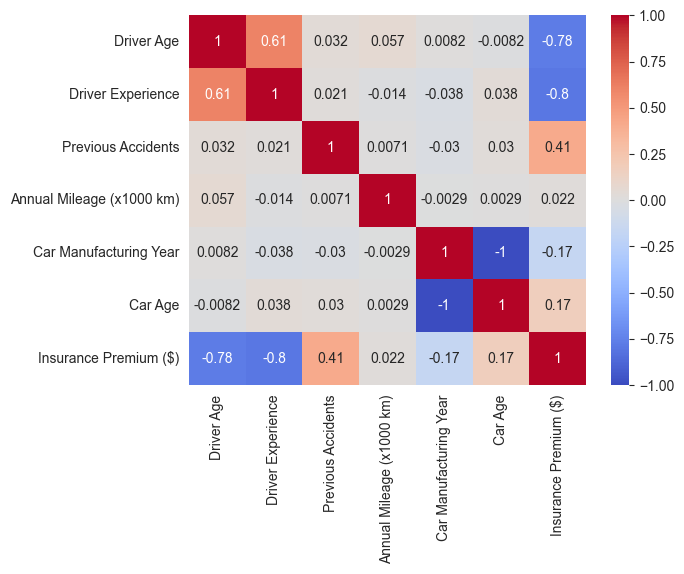

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

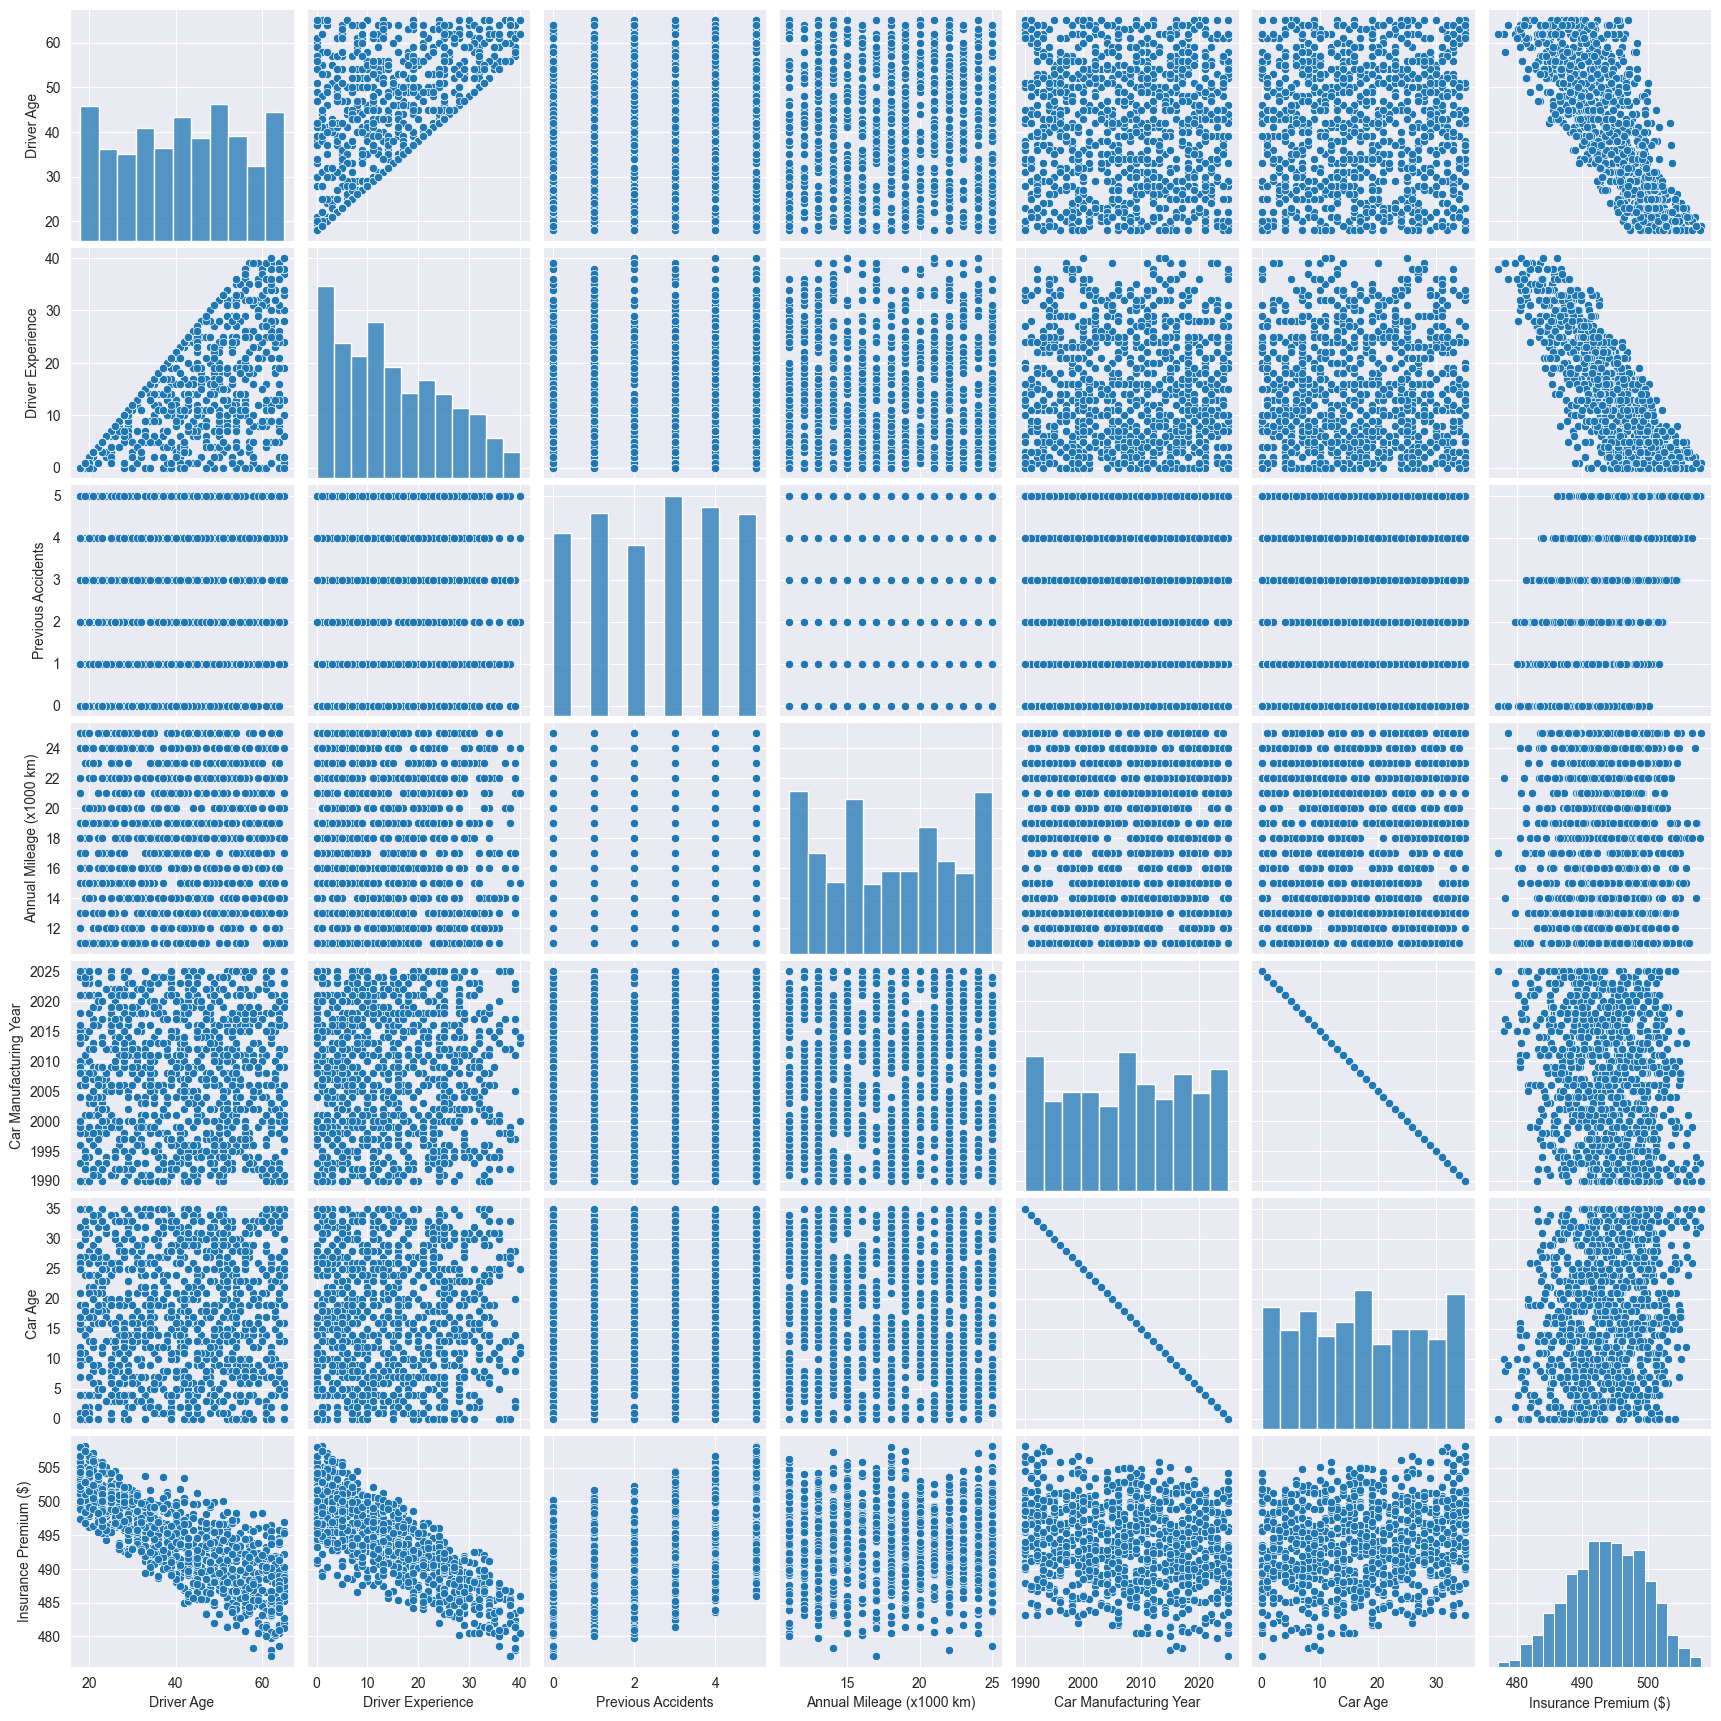

In [8]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numerical_columns])
plt.show()

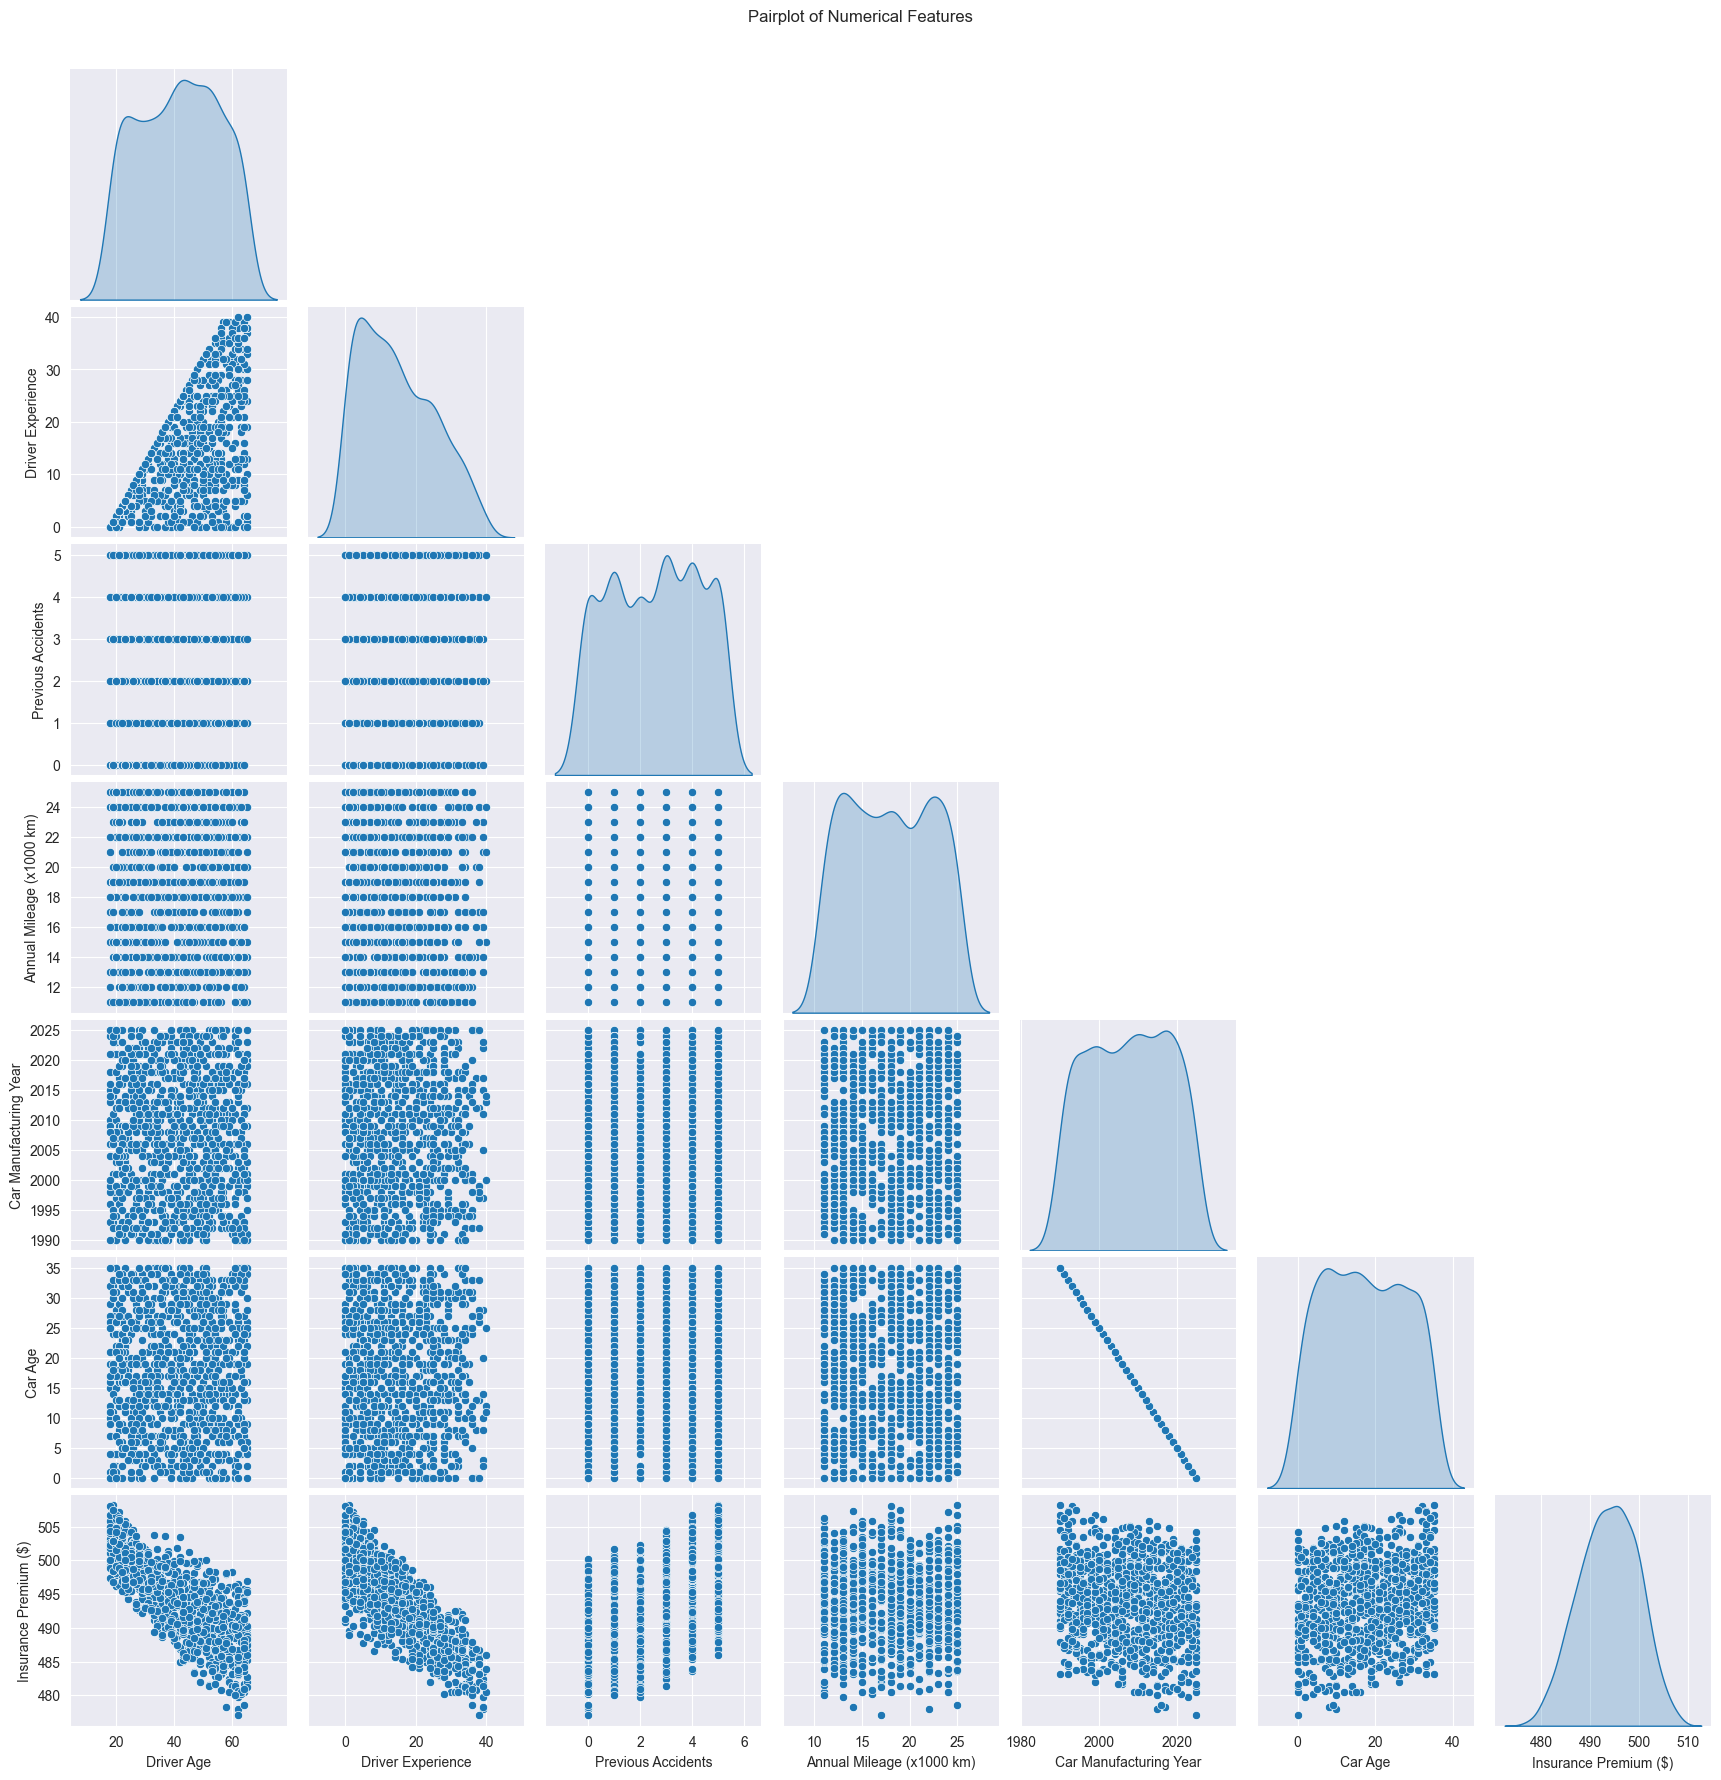

In [9]:
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

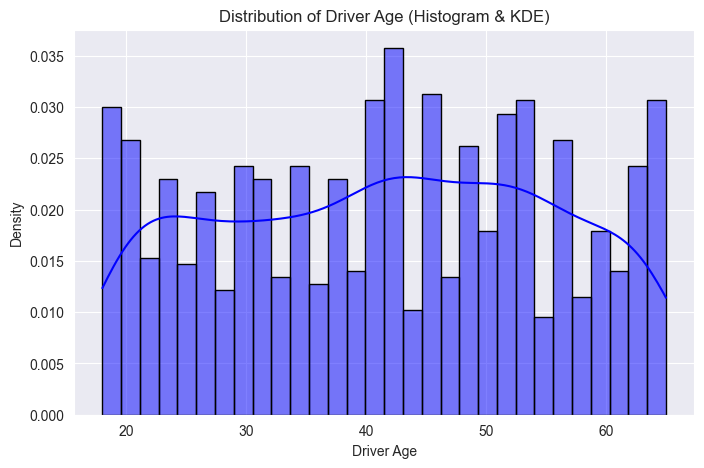

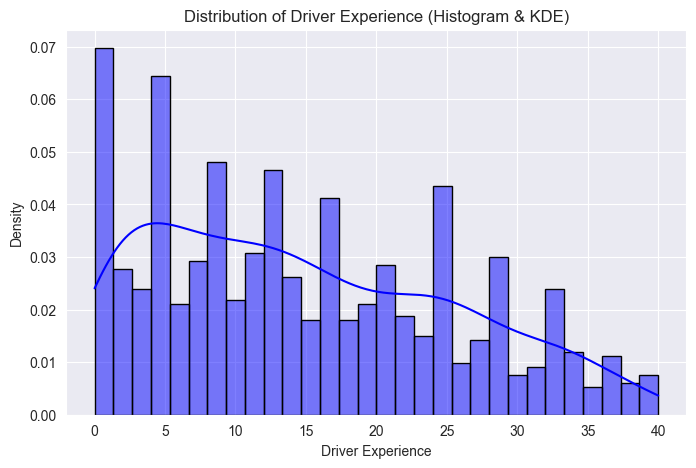

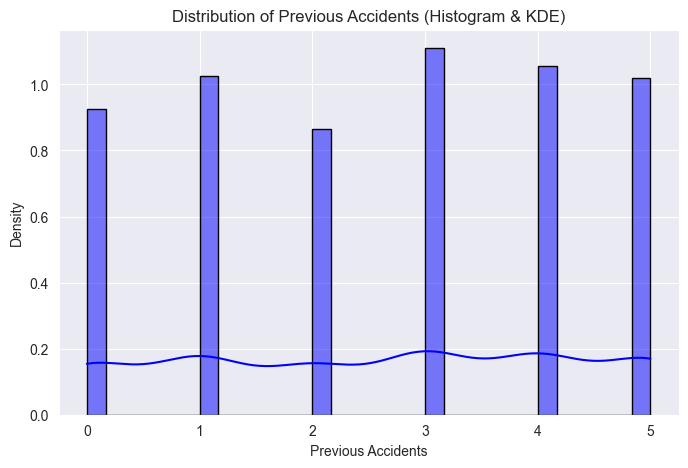

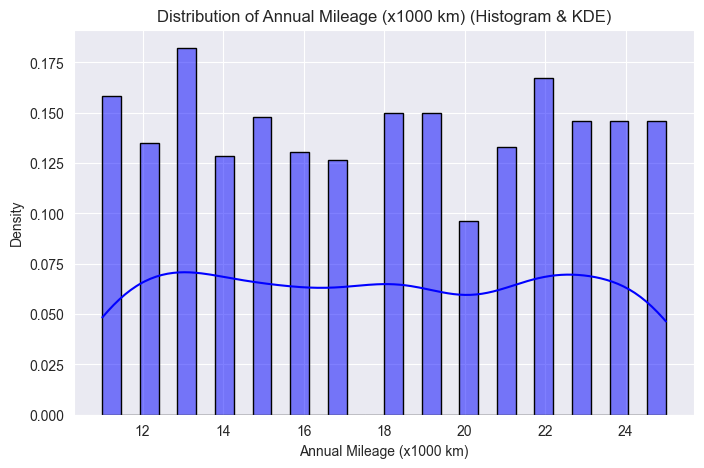

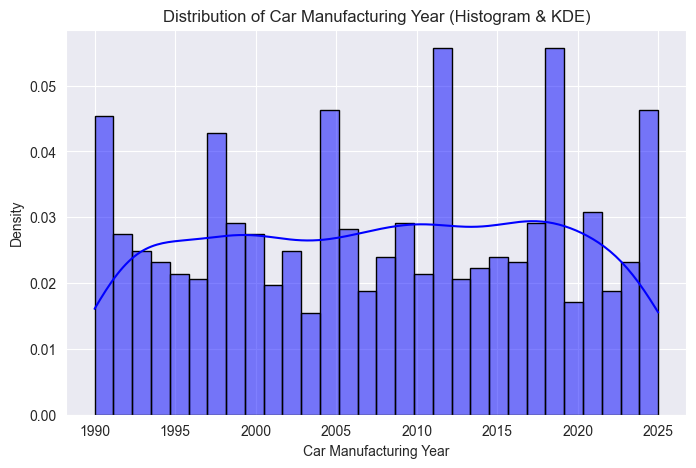

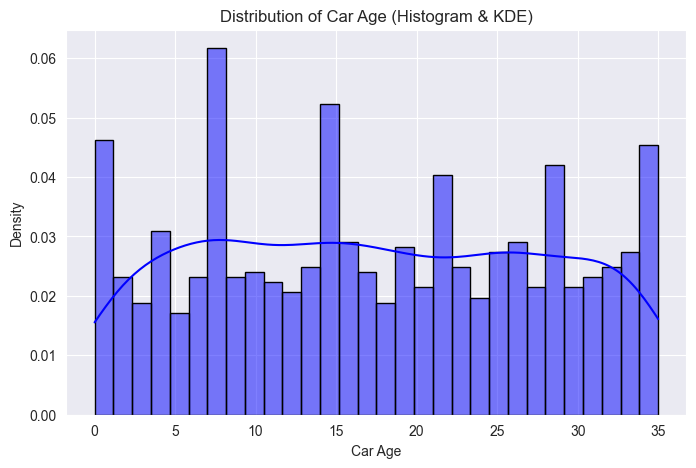

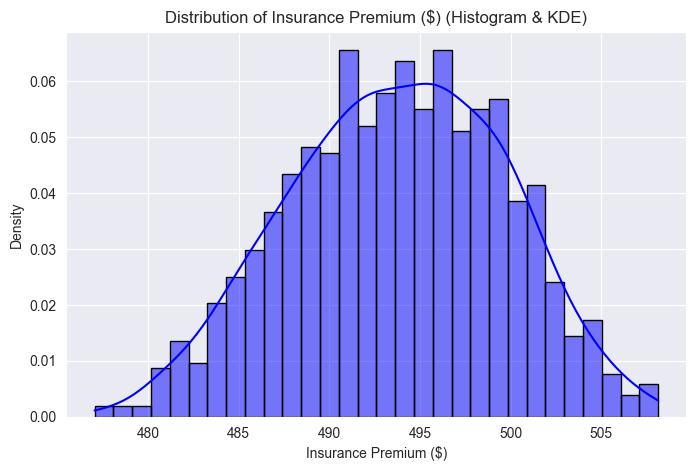

In [11]:
for column in df:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='blue', stat='density', edgecolor='black')
    plt.title(f"Distribution of {column} (Histogram & KDE)")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

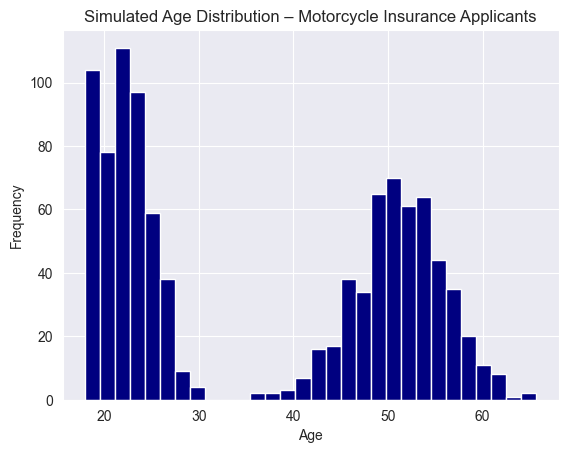

In [12]:
import numpy as np
import matplotlib.pyplot as plt

young_riders = np.random.normal(loc=22, scale=3, size=500)
older_riders = np.random.normal(loc=52, scale=5, size=500)
ages = np.clip(np.concatenate([young_riders, older_riders]), 18, 80)

plt.hist(ages, bins=30, color='navy', edgecolor='white')
plt.title("Simulated Age Distribution – Motorcycle Insurance Applicants")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare

# Load your dataset (assuming you saved it as CSV)


# Define age groups (bins)
bins = [18, 25, 40, 55, 66]  # Upper bound exclusive on last bin
labels = ['18–24', '25–39', '40–54', '55–65']
df['AgeGroup'] = pd.cut(df['Driver Age'], bins=bins, labels=labels, right=False)

# Count how many drivers fall into each age group
observed = df['AgeGroup'].value_counts().sort_index()
print("Observed frequencies:")
print(observed)

# Define expected proportions (adjust based on your target population)
expected_proportions = {
    '18–24': 0.10,
    '25–39': 0.30,
    '40–54': 0.35,
    '55–65': 0.25
}
expected = [expected_proportions[label] * len(df) for label in labels]

print("\nExpected frequencies:")
for label, e in zip(labels, expected):
    print(f"{label}: {e:.1f}")

# Perform the chi-square test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("\nChi-Square Test Results:")
print(f"Test Statistic: {chi_stat:.2f}")
print(f"p-value: {p_value:.5f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("❌ Reject the null hypothesis: Age distribution does NOT match the expected real-world pattern.")
else:
    print("✅ Fail to reject the null hypothesis: Age distribution may align with the expected population.")

Observed frequencies:
AgeGroup
18–24    149
25–39    287
40–54    353
55–65    211
Name: count, dtype: int64

Expected frequencies:
18–24: 100.0
25–39: 300.0
40–54: 350.0
55–65: 250.0

Chi-Square Test Results:
Test Statistic: 30.68
p-value: 0.00000
❌ Reject the null hypothesis: Age distribution does NOT match the expected real-world pattern.


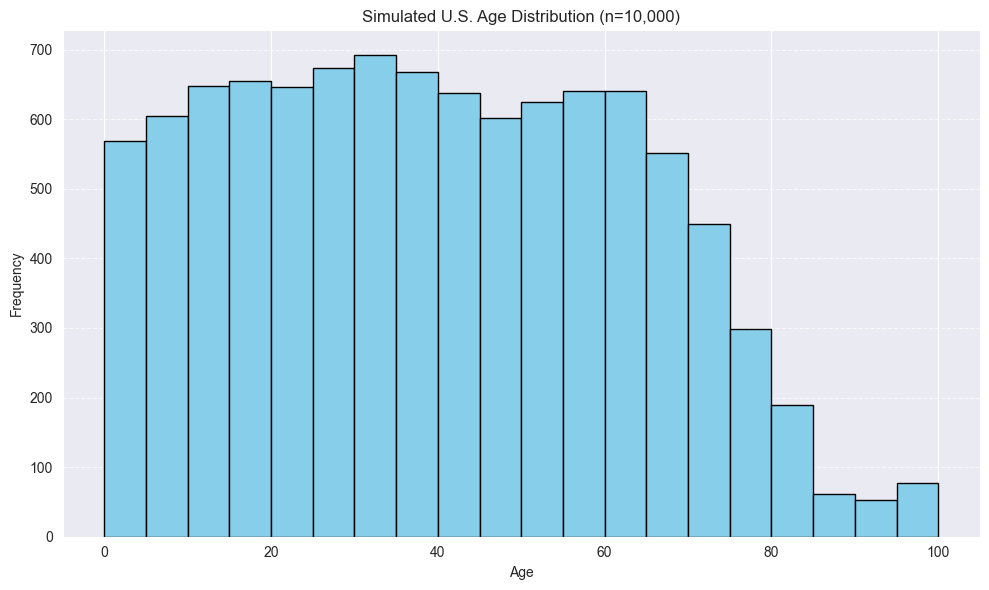

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define age groups and their approximate population percentages (2025 estimates)
age_bins = [
    (0, 4, 5.7),
    (5, 9, 6.05),
    (10, 14, 6.49),
    (15, 19, 6.56),
    (20, 24, 6.48),
    (25, 29, 6.75),
    (30, 34, 6.94),
    (35, 39, 6.69),
    (40, 44, 6.39),
    (45, 49, 6.03),
    (50, 54, 6.26),
    (55, 59, 6.41),
    (60, 64, 6.42),
    (65, 69, 5.52),
    (70, 74, 4.5),
    (75, 79, 3.0),
    (80, 84, 1.91),
    (85, 100, 1.92)
]

# Normalize percentages to sum to 1
total_pct = sum([pct for _, _, pct in age_bins])
normalized_bins = [(start, end, pct / total_pct) for start, end, pct in age_bins]

# Generate synthetic population
population_size = 10000
ages = []

for start, end, weight in normalized_bins:
    n = int(weight * population_size)
    ages.extend(np.random.randint(start, end + 1, size=n))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=range(0, 101, 5), edgecolor='black', color='skyblue')
plt.title("Simulated U.S. Age Distribution (n=10,000)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

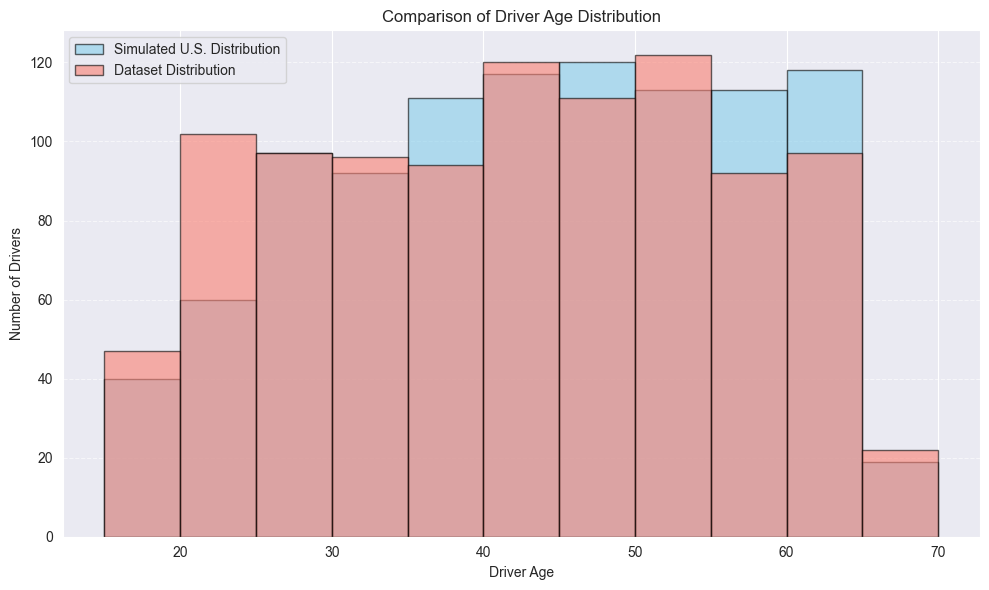

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV file


# Extract actual driver ages from your data
actual_ages = df['Driver Age']

# Simulate a realistic U.S. population distribution
sim_bins = [
    (18, 24, 0.10),
    (25, 39, 0.30),
    (40, 54, 0.35),
    (55, 65, 0.25)
]

# Generate simulated ages
simulated_ages = []
population_size = len(df)  # match size to your data
for start, end, pct in sim_bins:
    count = int(pct * population_size)
    simulated_ages += list(np.random.randint(start, end + 1, size=count))

# Plot histograms
bin_edges = range(15, 71, 5)  # bin widths of 5 years

plt.figure(figsize=(10, 6))
plt.hist(simulated_ages, bins=bin_edges, alpha=0.6, label='Simulated U.S. Distribution', color='skyblue', edgecolor='black')
plt.hist(actual_ages, bins=bin_edges, alpha=0.6, label='Dataset Distribution', color='salmon', edgecolor='black')
plt.xlabel("Driver Age")
plt.ylabel("Number of Drivers")
plt.title("Comparison of Driver Age Distribution")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

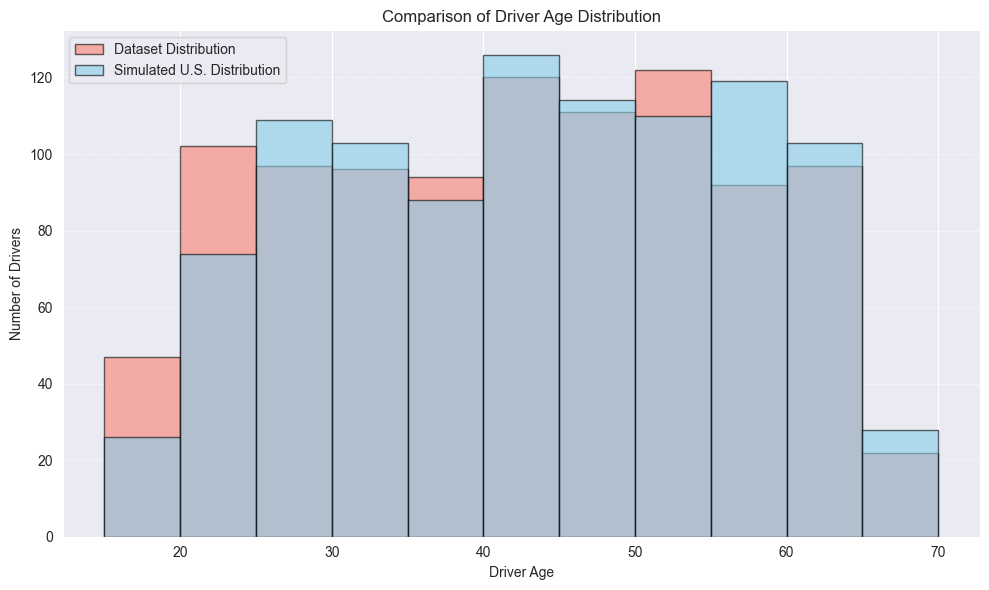

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV file


# Extract actual driver ages from your data
actual_ages = df['Driver Age']

# Simulate a realistic U.S. population distribution
sim_bins = [
    (18, 24, 0.10),
    (25, 39, 0.30),
    (40, 54, 0.35),
    (55, 65, 0.25)
]

# Generate simulated ages
simulated_ages = []
population_size = len(df)  # match size to your data
for start, end, pct in sim_bins:
    count = int(pct * population_size)
    simulated_ages += list(np.random.randint(start, end + 1, size=count))

# Plot histograms
bin_edges = range(15, 71, 5)  # bin widths of 5 years

plt.figure(figsize=(10, 6))
plt.hist(actual_ages, bins=bin_edges, alpha=0.6, label='Dataset Distribution', color='salmon', edgecolor='black')
plt.hist(simulated_ages, bins=bin_edges, alpha=0.6, label='Simulated U.S. Distribution', color='skyblue', edgecolor='black')

plt.xlabel("Driver Age")
plt.ylabel("Number of Drivers")
plt.title("Comparison of Driver Age Distribution")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare


# Define age bins (18–69), matching visual age categories from Australia chart
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ["18–24", "25–29", "30–34", "35–39", "40–44",
          "45–49", "50–54", "55–59", "60–64", "65–69"]

# Bin the ages
df["Age Group"] = pd.cut(df["Driver Age"], bins=bins, labels=labels, right=False)

# Step 1: Observed frequencies from your data
observed = df["Age Group"].value_counts().sort_index()

# Step 2: Expected frequencies (based on real-world chart, using 1,000 samples)
expected_percent = {
    "18–24": 0.06,
    "25–29": 0.08,
    "30–34": 0.08,
    "35–39": 0.07,
    "40–44": 0.06,
    "45–49": 0.06,
    "50–54": 0.06,
    "55–59": 0.05,
    "60–64": 0.05,
    "65–69": 0.04
}


# Normalize total to match observed sample size
sample_size = observed.sum()
expected = [expected_percent[label] * sample_size for label in labels]

# Step 3: Chi-square test
chi_stat, p_value = chisquare(f_obs=observed.values, f_exp=expected)
alpha = 0.05

# Step 4: Print results
print("\nChi-Square Goodness-of-Fit Test:")
print(f"Confidence level (α): {alpha}")
print(f"Test statistic (χ²): {chi_stat:.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < alpha:
    print("❌ Reject null hypothesis: The dataset's age distribution differs from real-world population.")
else:
    print("✅ Fail to reject null hypothesis: The age distribution may match the population.")

# Step 5: Plot observed vs expected
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, observed.values, width, label="Observed", color="salmon", edgecolor="black")
bars2 = ax.bar(x + width/2, expected, width, label="Expected", color="skyblue", edgecolor="black")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Driver Count")
ax.set_title("Observed vs. Expected Age Distribution")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.639344262295082


Chi-Square Goodness-of-Fit Test (vs. U.S. Driver Age Distribution):
Confidence level (α): 0.05
Test statistic (χ²): 103.19
P-value: 0.00000000000000000356
❌ Reject null hypothesis: GILAD IS CORRECT ! DATA AINT CORRECT ! UNUSABLE ! 


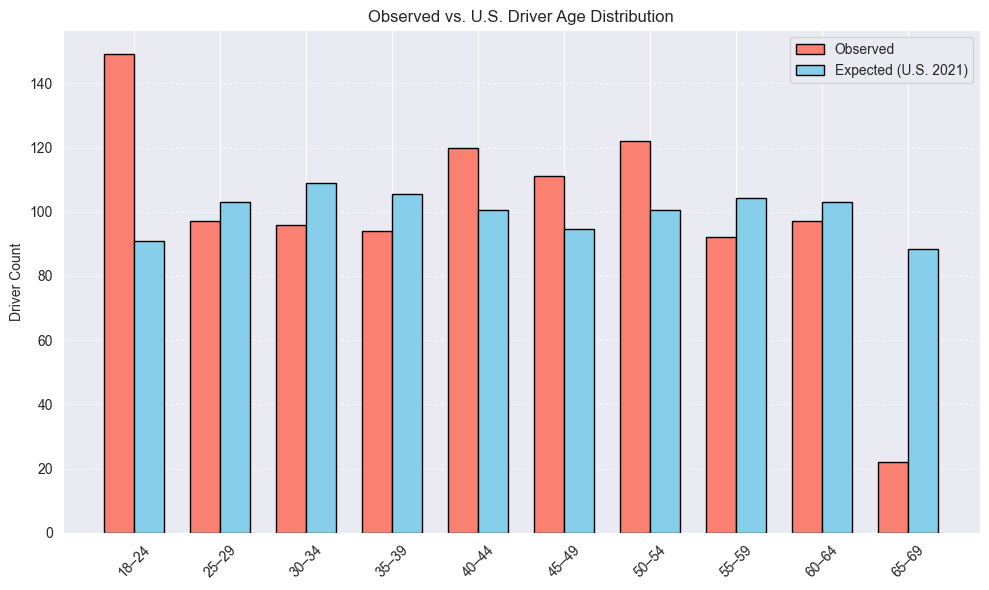

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Load your dataset


# Define age bins and labels
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ["18–24", "25–29", "30–34", "35–39", "40–44",
          "45–49", "50–54", "55–59", "60–64", "65–69"]

# Bin the ages
df["Age Group"] = pd.cut(df["Driver Age"], bins=bins, labels=labels, right=False)

# Get observed frequencies from your dataset
observed = df["Age Group"].value_counts().sort_index()
observed_total = observed.sum()

# U.S. driver distribution percentages (IL2021 real data)
us_driver_percent = {
    "18–24": 0.075,
    "25–29": 0.085,
    "30–34": 0.090,
    "35–39": 0.087,
    "40–44": 0.083,
    "45–49": 0.078,
    "50–54": 0.083,
    "55–59": 0.086,
    "60–64": 0.085,
    "65–69": 0.073
}

# Match expected to *observed total count* exactly
expected_raw = [us_driver_percent[label] for label in labels]
total_expected = sum(expected_raw)
expected = [(p / total_expected) * observed_total for p in expected_raw]

# Chi-square test
chi_stat, p_value = chisquare(f_obs=observed.values, f_exp=expected)
alpha = 0.05

# Print results
print("\nChi-Square Goodness-of-Fit Test (vs. U.S. Driver Age Distribution):")
print(f"Confidence level (α): {alpha}")
print(f"Test statistic (χ²): {chi_stat:.2f}")
print(f"P-value: {p_value:.20f}")

if p_value < alpha:
    print("❌ Reject null hypothesis: GILAD IS CORRECT ! DATA AINT CORRECT ! UNUSABLE ! ")
else:
    print("✅ Fail to reject null hypothesis: Age distribution may align with U.S. driver population.")

# Plot observed vs expected
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, observed.values, width, label="Observed", color="salmon", edgecolor="black")
plt.bar(x + width/2, expected, width, label="Expected (U.S. IL2021)", color="skyblue", edgecolor="black")
plt.xticks(x, labels, rotation=45)
plt.ylabel("Driver Count")
plt.title("Observed vs. U.S. Driver Age Distribution")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Kolmogorov–Smirnov Test Results:

Distribution   D-statistic               P-value
--------------------------------------------------
Normal             0.03569  0.1527866247626611
Log-normal         0.03781  0.1117262942969014
Gamma              0.03712  0.1239182533584723

Significance level (α): 0.05
✅ Fail to reject null hypothesis for Normal distribution (p = 0.1527866248)
✅ Fail to reject null hypothesis for Log-normal distribution (p = 0.1117262943)
✅ Fail to reject null hypothesis for Gamma distribution (p = 0.1239182534)


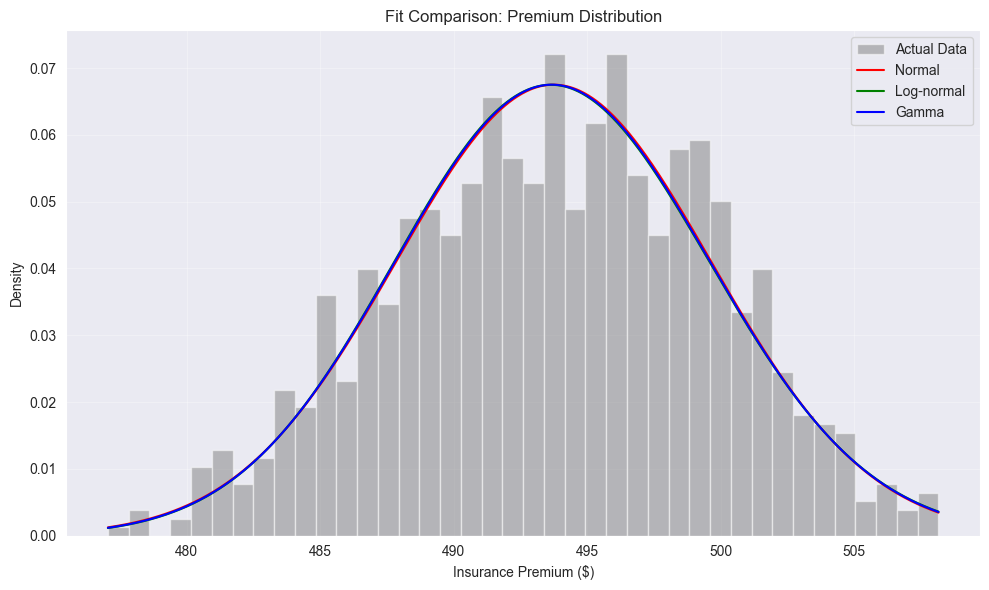

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm, lognorm, gamma

# Load your CSV data

prices = df["Insurance Premium ($)"].dropna()

# --------------------------------------------------------------------
# Step 1: Normal Distribution Test
mu_norm, std_norm = prices.mean(), prices.std()
ks_norm = kstest(prices, 'norm', args=(mu_norm, std_norm))

# --------------------------------------------------------------------
# Step 2: Log-normal Distribution Test
# Lognorm requires shape (sigma), loc, and scale
log_prices = np.log(prices)
shape_ln, loc_ln, scale_ln = lognorm.fit(prices, floc=0)  # loc often fixed at 0
ks_lognorm = kstest(prices, 'lognorm', args=(shape_ln, loc_ln, scale_ln))

# --------------------------------------------------------------------
# Step 3: Gamma Distribution Test
shape_g, loc_g, scale_g = gamma.fit(prices, floc=0)
ks_gamma = kstest(prices, 'gamma', args=(shape_g, loc_g, scale_g))

# --------------------------------------------------------------------
# Step 4: Results Summary
print("Kolmogorov–Smirnov Test Results:\n")
print(f"{'Distribution':<12}  {'D-statistic':>12}  {'P-value':>20}")
print("-" * 50)
print(f"{'Normal':<12}  {ks_norm.statistic:12.5f}  {ks_norm.pvalue:.16f}")
print(f"{'Log-normal':<12}  {ks_lognorm.statistic:12.5f}  {ks_lognorm.pvalue:.16f}")
print(f"{'Gamma':<12}  {ks_gamma.statistic:12.5f}  {ks_gamma.pvalue:.16f}")

# Interpretation
alpha = 0.05
print(f"\nSignificance level (α): {alpha}")
for name, result in [("Normal", ks_norm), ("Log-normal", ks_lognorm), ("Gamma", ks_gamma)]:
    decision = "❌ Reject" if result.pvalue < alpha else "✅ Fail to reject"
    print(f"{decision} null hypothesis for {name} distribution (p = {result.pvalue:.10f})")

# --------------------------------------------------------------------
# Step 5: Optional Visual Comparison
x = np.linspace(min(prices), max(prices), 1000)
plt.figure(figsize=(10, 6))

# Histogram of real data
plt.hist(prices, bins=40, density=True, alpha=0.5, color='gray', label="Actual Data")

# Overlays
plt.plot(x, norm.pdf(x, mu_norm, std_norm), 'r-', label="Normal")
plt.plot(x, lognorm.pdf(x, shape_ln, loc_ln, scale_ln), 'g-', label="Log-normal")
plt.plot(x, gamma.pdf(x, shape_g, loc_g, scale_g), 'b-', label="Gamma")

plt.title("Fit Comparison: Premium Distribution")
plt.xlabel("Insurance Premium ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Kolmogorov–Smirnov Test for Normality:
Test statistic (D): 0.035739
P-value: 0.1517104583062324
✅ Fail to reject null hypothesis: Premiums may follow a normal distribution.


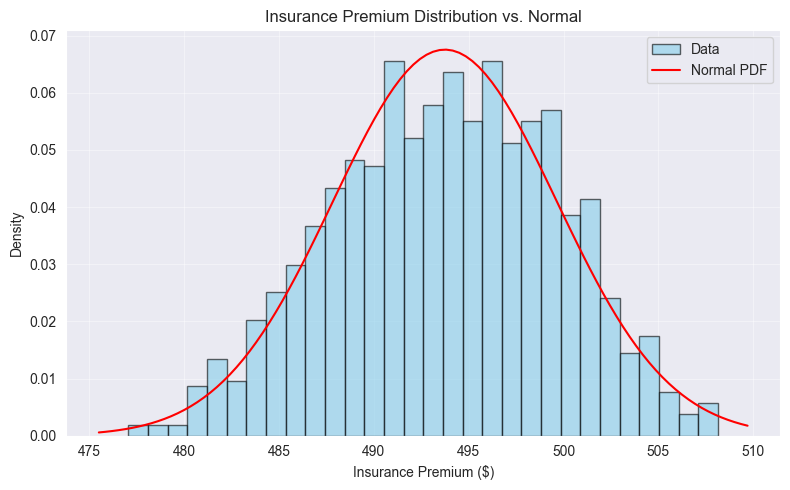

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

# Load your dataset

prices = df["Insurance Premium ($)"].dropna()

# Step 1: Normalize the prices (mean=0, std=1 for proper KS test)
mean = np.mean(prices)
std = np.std(prices)
standardized_prices = (prices - mean) / std

# Step 2: Run K–S test against the standard normal distribution
ks_stat, p_value = kstest(standardized_prices, "norm")

# Step 3: Print results
print("\nKolmogorov–Smirnov Test for Normality:")
print(f"Test statistic (D): {ks_stat:.6f}")
print(f"P-value: {p_value:.16f}")

alpha = 0.05
if p_value < alpha:
    print("❌ Reject null hypothesis: Premiums are NOT normally distributed.")
else:
    print("✅ Fail to reject null hypothesis: Premiums may follow a normal distribution.")

# Step 4: Optional – Plot histogram vs. normal curve
plt.figure(figsize=(8, 5))
count, bins, _ = plt.hist(prices, bins=30, density=True, alpha=0.6, color="skyblue", edgecolor='black', label="Data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, "r", label="Normal PDF")
plt.title("Insurance Premium Distribution vs. Normal")
plt.xlabel("Insurance Premium ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


Kolmogorov–Smirnov Goodness-of-Fit Test:
Distribution  D-statistic                P-value
--------------------------------------------------
Normal            0.03569     0.1527866247626611
Log-normal        0.03781     0.1117262942969014
Gamma             0.03712     0.1239182533584723


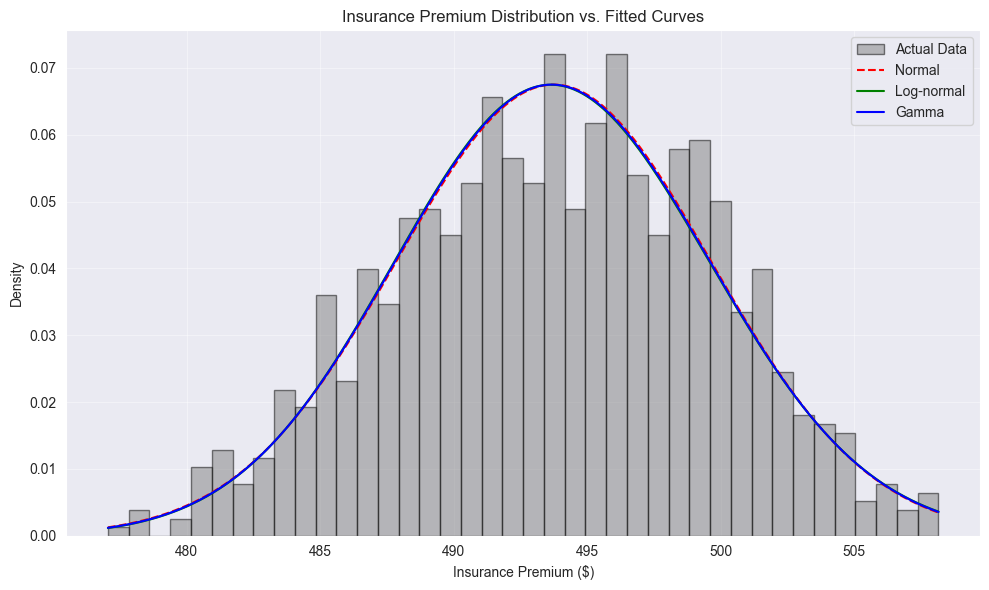

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm, lognorm, gamma

# Load the dataset

prices = df["Insurance Premium ($)"].dropna()

# ----------------------------------------------------------------
# Fit distributions and run K–S verbal test results
results = {}

# ✅ Normal
mu_norm, std_norm = prices.mean(), prices.std()
ks_norm = kstest(prices, 'norm', args=(mu_norm, std_norm))
results["Normal"] = {"stat": ks_norm.statistic, "p": ks_norm.pvalue}

# ✅ Log-normal
shape_ln, loc_ln, scale_ln = lognorm.fit(prices, floc=0)
ks_lognorm = kstest(prices, 'lognorm', args=(shape_ln, loc_ln, scale_ln))
results["Log-normal"] = {"stat": ks_lognorm.statistic, "p": ks_lognorm.pvalue}

# ✅ Gamma
shape_g, loc_g, scale_g = gamma.fit(prices, floc=0)
ks_gamma = kstest(prices, 'gamma', args=(shape_g, loc_g, scale_g))
results["Gamma"] = {"stat": ks_gamma.statistic, "p": ks_gamma.pvalue}

# ----------------------------------------------------------------
# 📊 Print Summary
print("\nKolmogorov–Smirnov Goodness-of-Fit Test:")
print(f"{'Distribution':<12} {'D-statistic':>12} {'P-value':>22}")
print("-" * 50)
for dist, res in results.items():
    print(f"{dist:<12} {res['stat']:12.5f} {res['p']:22.16f}")

# ----------------------------------------------------------------
# 📉 Plot histogram with fitted PDFs
x = np.linspace(prices.min(), prices.max(), 1000)
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=40, density=True, alpha=0.5, color='gray', edgecolor='black', label="Actual Data")

plt.plot(x, norm.pdf(x, mu_norm, std_norm), 'r--', label="Normal")
plt.plot(x, lognorm.pdf(x, shape_ln, loc_ln, scale_ln), 'g-', label="Log-normal")
plt.plot(x, gamma.pdf(x, shape_g, loc_g, scale_g), 'b-', label="Gamma")

plt.title("Insurance Premium Distribution vs. Fitted Curves")
plt.xlabel("Insurance Premium ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

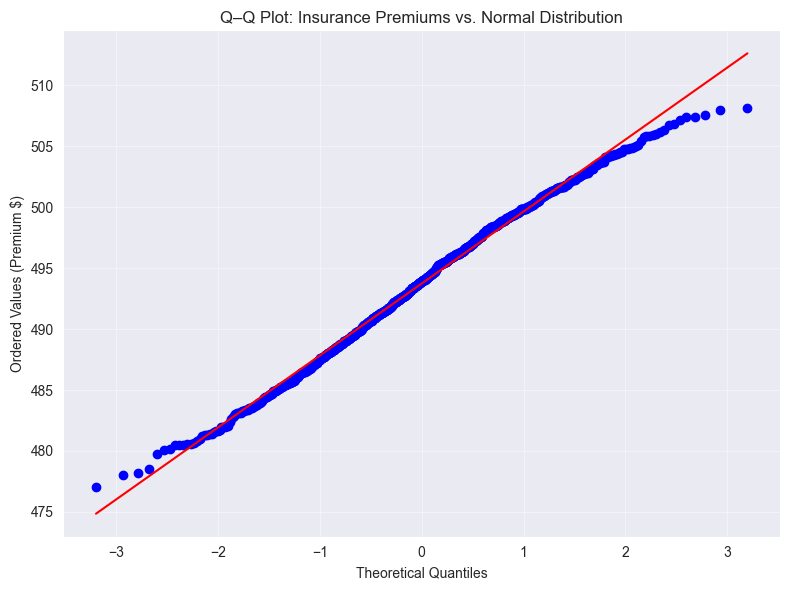

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset

prices = df["Insurance Premium ($)"].dropna()

# Plot Q–Q plot against the normal distribution
plt.figure(figsize=(8, 6))
stats.probplot(prices, dist="norm", plot=plt)
plt.title("Q–Q Plot: Insurance Premiums vs. Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values (Premium $)")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

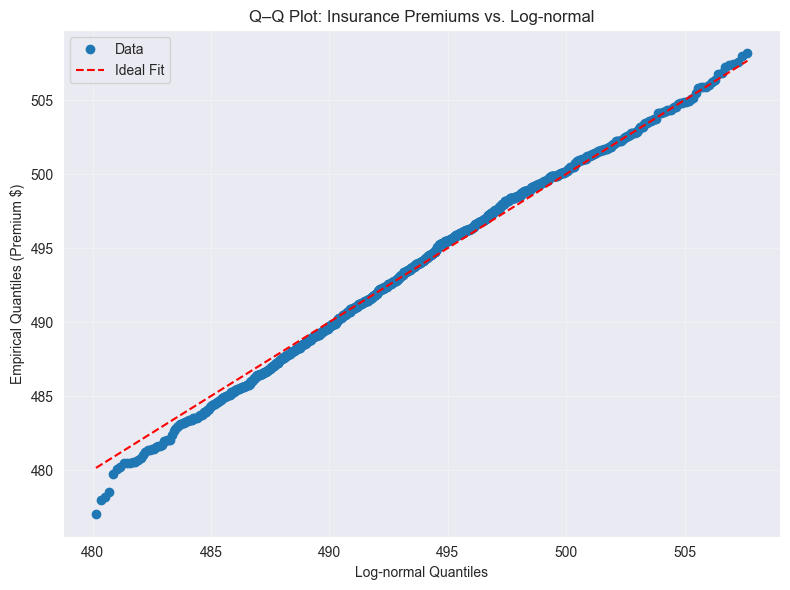

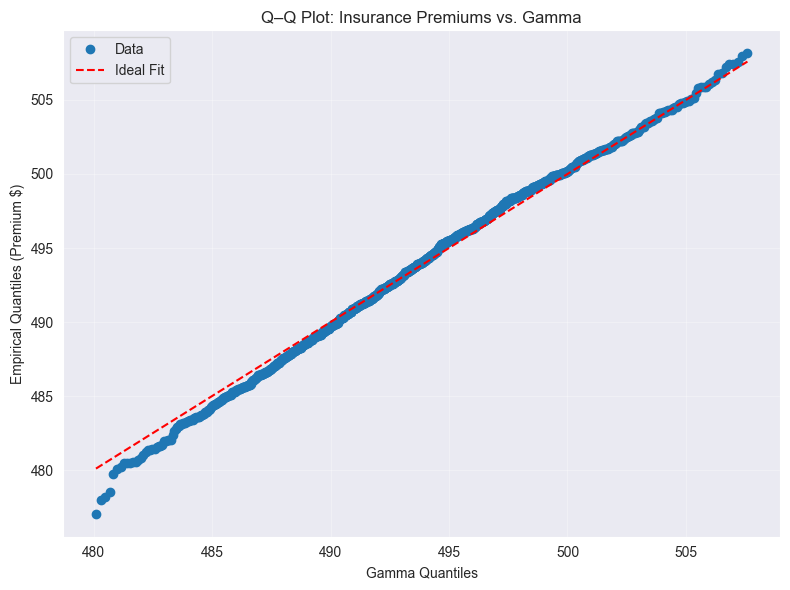

In [32]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load your CSV

prices = df["Insurance Premium ($)"].dropna().values

# ----------------------------------------
# Q–Q Plot against Log-normal
shape_ln, loc_ln, scale_ln = stats.lognorm.fit(prices, floc=0)
lognorm_theoretical = stats.lognorm.ppf(
    np.linspace(0.01, 0.99, len(prices)), shape_ln, loc=loc_ln, scale=scale_ln
)
lognorm_sample = np.sort(prices)

plt.figure(figsize=(8, 6))
plt.plot(lognorm_theoretical, lognorm_sample, 'o', label="Data")
plt.plot(lognorm_theoretical, lognorm_theoretical, 'r--', label="Ideal Fit")
plt.title("Q–Q Plot: Insurance Premiums vs. Log-normal")
plt.xlabel("Log-normal Quantiles")
plt.ylabel("Empirical Quantiles (Premium $)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ----------------------------------------
# Q–Q Plot against Gamma
shape_g, loc_g, scale_g = stats.gamma.fit(prices, floc=0)
gamma_theoretical = stats.gamma.ppf(
    np.linspace(0.01, 0.99, len(prices)), shape_g, loc=loc_g, scale=scale_g
)
gamma_sample = np.sort(prices)

plt.figure(figsize=(8, 6))
plt.plot(gamma_theoretical, gamma_sample, 'o', label="Data")
plt.plot(gamma_theoretical, gamma_theoretical, 'r--', label="Ideal Fit")
plt.title("Q–Q Plot: Insurance Premiums vs. Gamma")
plt.xlabel("Gamma Quantiles")
plt.ylabel("Empirical Quantiles (Premium $)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

(1000,)


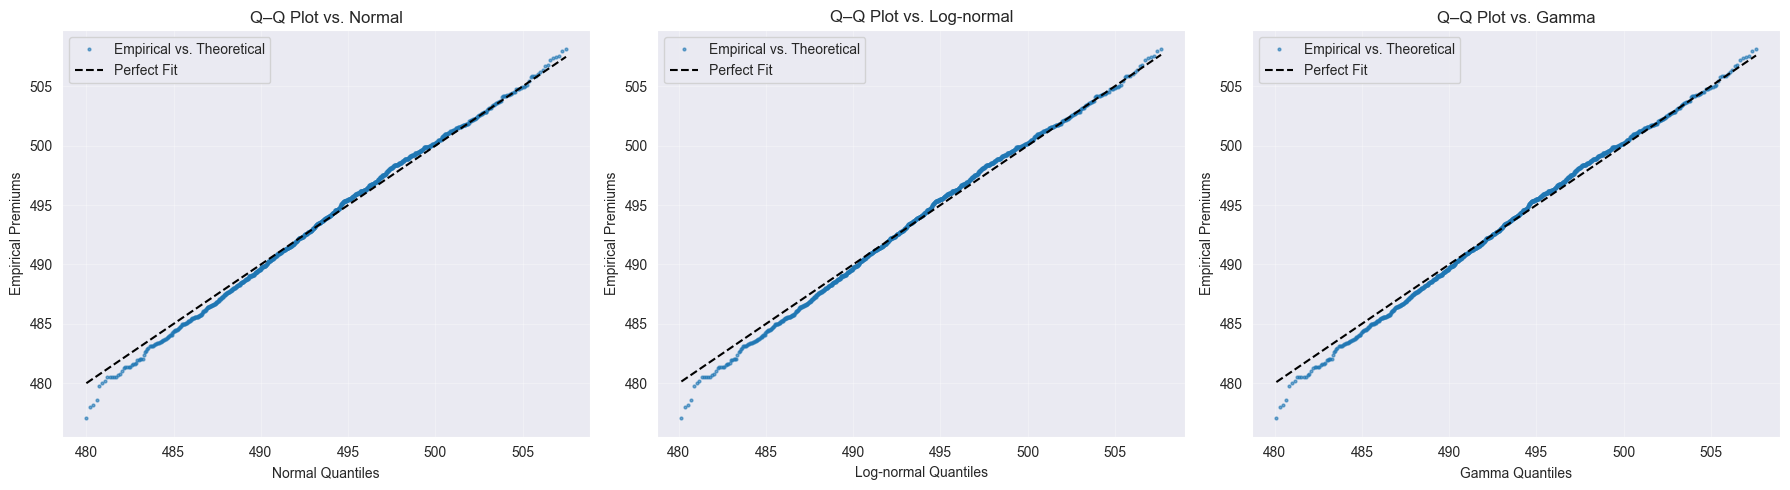

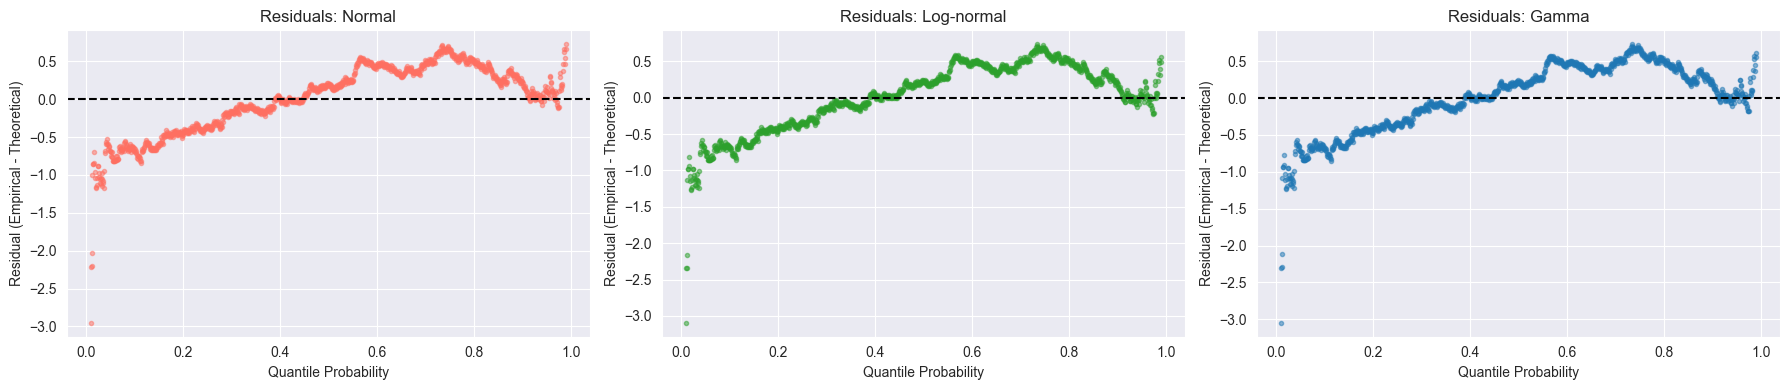


🔢 Fit Quality Scores (lower = better):
Distribution       RMSE        MAE
-----------------------------------
Normal           0.4555     0.3705
Log-normal       0.4702     0.3762
Gamma            0.4651     0.3739


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, gamma, probplot

# Load the dataset

prices = df["Insurance Premium ($)"].dropna().values
print(prices.shape)
n = len(prices)
p = np.linspace(0.01, 0.99, n)

# Empirical sorted premiums
empirical = np.sort(prices)

# Fitting the distributions
mu_norm, std_norm = norm.fit(prices)
shape_ln, loc_ln, scale_ln = lognorm.fit(prices, floc=0)
shape_g, loc_g, scale_g = gamma.fit(prices, floc=0)

# Generate theoretical quantiles
q_normal = norm.ppf(p, loc=mu_norm, scale=std_norm)
q_lognorm = lognorm.ppf(p, shape_ln, loc=loc_ln, scale=scale_ln)
q_gamma = gamma.ppf(p, shape_g, loc=loc_g, scale=scale_g)

# Function to calculate RMSE and MAE
def compute_scores(theoretical, empirical):
    residuals = empirical - theoretical
    rmse = np.sqrt(np.mean(residuals**2))
    mae = np.mean(np.abs(residuals))
    return rmse, mae, residuals

# Scores and residuals
rmse_norm, mae_norm, resid_norm = compute_scores(q_normal, empirical)
rmse_ln, mae_ln, resid_ln = compute_scores(q_lognorm, empirical)
rmse_gamma, mae_gamma, resid_gamma = compute_scores(q_gamma, empirical)

# --- Q–Q Plots ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
dist_names = ["Normal", "Log-normal", "Gamma"]
quantiles = [q_normal, q_lognorm, q_gamma]
colors = ["#FF6F61", "#2CA02C", "#1F77B4"]

for ax, name, q, color in zip(axs, dist_names, quantiles, colors):
    ax.plot(q, empirical, 'o', markersize=2, alpha=0.6, label="Empirical vs. Theoretical")
    ax.plot(q, q, 'k--', label="Perfect Fit")
    ax.set_title(f"Q–Q Plot vs. {name}")
    ax.set_xlabel(f"{name} Quantiles")
    ax.set_ylabel("Empirical Premiums")
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# --- Residual Plots ---
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
resid_data = [resid_norm, resid_ln, resid_gamma]
for ax, resid, name, color in zip(axs, resid_data, dist_names, colors):
    ax.plot(p, resid, '.', alpha=0.5, color=color)
    ax.axhline(0, color='black', linestyle='--')
    ax.set_title(f"Residuals: {name}")
    ax.set_xlabel("Quantile Probability")
    ax.set_ylabel("Residual (Empirical - Theoretical)")

plt.tight_layout()
plt.show()

# --- Score Summary ---
print("\n🔢 Fit Quality Scores (lower = better):")
print(f"{'Distribution':<12} {'RMSE':>10} {'MAE':>10}")
print("-" * 35)
print(f"{'Normal':<12} {rmse_norm:10.4f} {mae_norm:10.4f}")
print(f"{'Log-normal':<12} {rmse_ln:10.4f} {mae_ln:10.4f}")
print(f"{'Gamma':<12} {rmse_gamma:10.4f} {mae_gamma:10.4f}")

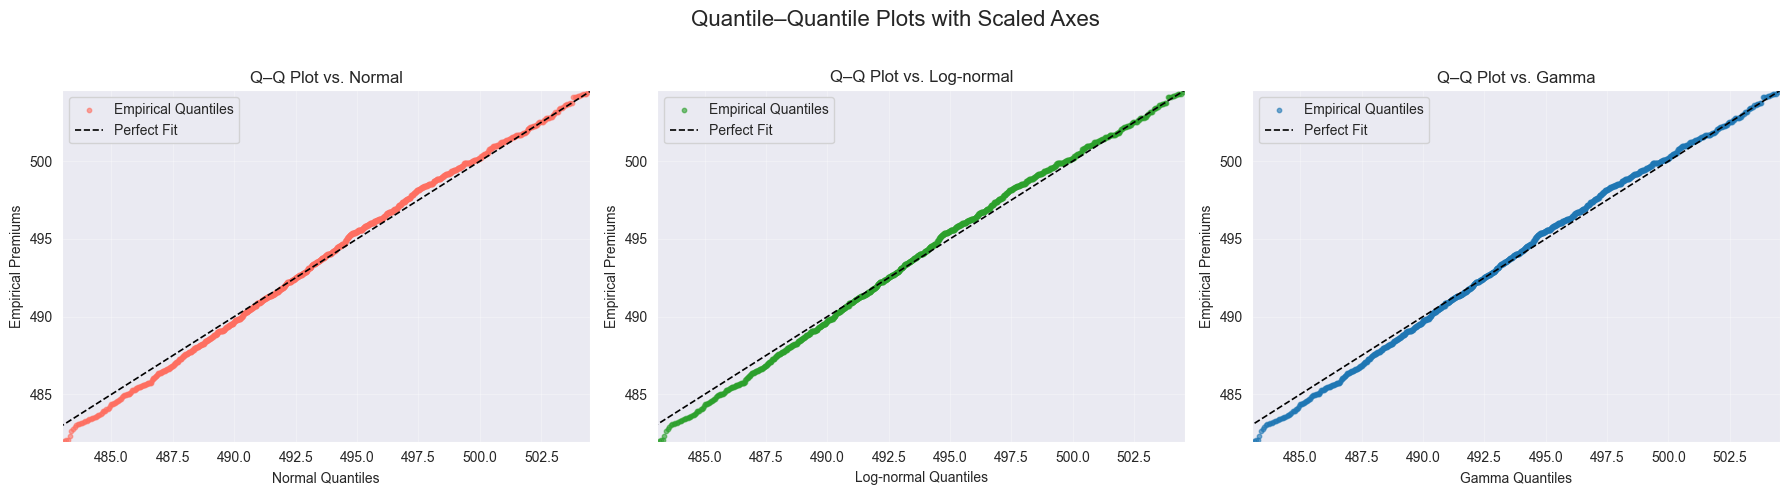

In [42]:
import matplotlib.pyplot as plt

# --- Q–Q Plots with adjusted zoom and axis scaling ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
dist_names = ["Normal", "Log-normal", "Gamma"]
quantiles = [q_normal, q_lognorm, q_gamma]
colors = ["#FF6F61", "#2CA02C", "#1F77B4"]

for ax, name, q, color in zip(axs, dist_names, quantiles, colors):
    ax.scatter(q, empirical, s=10, alpha=0.6, color=color, label="Empirical Quantiles")
    ax.plot(q, q, 'k--', linewidth=1.2, label="Perfect Fit")

    # Tighten focus: zoom to central 95% of data
    qmin, qmax = np.percentile(q, [2.5, 97.5])
    emin, emax = np.percentile(empirical, [2.5, 97.5])
    ax.set_xlim(qmin, qmax)
    ax.set_ylim(emin, emax)

    ax.set_title(f"Q–Q Plot vs. {name}")
    ax.set_xlabel(f"{name} Quantiles")
    ax.set_ylabel("Empirical Premiums")
    ax.legend()
    ax.grid(alpha=0.3)

plt.suptitle("Quantile–Quantile Plots with Scaled Axes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

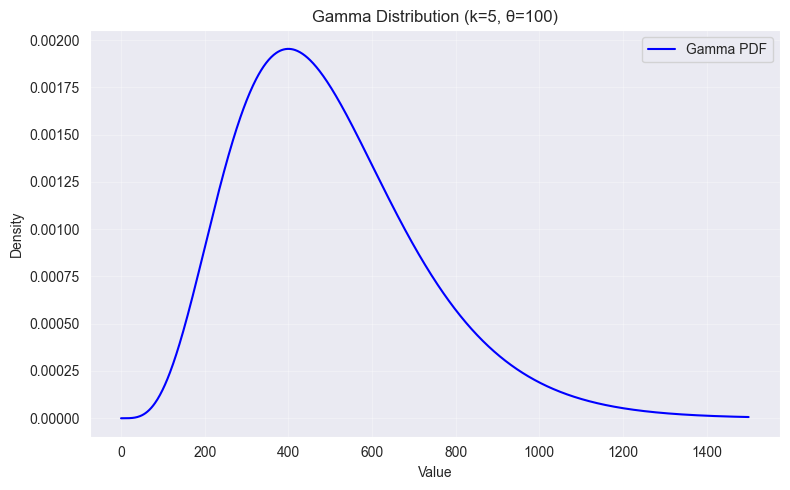

In [34]:
from scipy.stats import gamma

# Parameters: shape (k), location, scale (θ)
shape, loc, scale = 5, 0, 100
x = np.linspace(0, 1500, 1000)
pdf = gamma.pdf(x, shape, loc, scale)

plt.figure(figsize=(8, 5))
plt.plot(x, pdf, color='blue', label='Gamma PDF')
plt.title("Gamma Distribution (k=5, θ=100)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

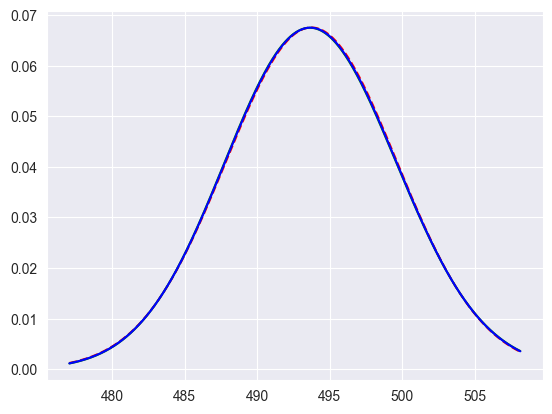

In [35]:
from scipy.stats import norm, lognorm, gamma

x = np.linspace(min(prices), max(prices), 1000)
plt.plot(x, norm.pdf(x, mu_norm, std_norm), 'r--', label="Normal")
plt.plot(x, lognorm.pdf(x, shape_ln, loc_ln, scale_ln), 'g-', label="Log-normal")
plt.plot(x, gamma.pdf(x, shape_g, loc_g, scale_g), 'b-', label="Gamma")


In [36]:
print("Normal μ, σ:", mu_norm, std_norm)
print("Log-normal shape, loc, scale:", shape_ln, loc_ln, scale_ln)
print("Gamma shape, loc, scale:", shape_g, loc_g, scale_g)

Normal μ, σ: 493.74225 5.906733652154971
Log-normal shape, loc, scale: 0.011973841836934335 0 493.7068781835116
Gamma shape, loc, scale: 6979.233797215724 0 0.07074447773865553


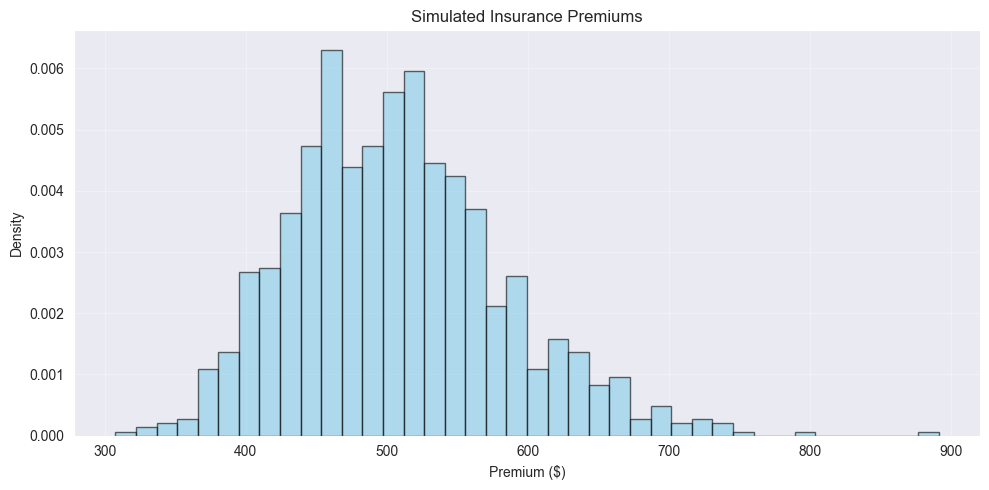


K–S Test Results on Simulated Premiums:
Distribution  D-statistic              P-value
---------------------------------------------
Normal            0.04217 0.0554777101907169
Log-normal        0.02148 0.7369569123250566
Gamma             0.02745 0.4304638389581512


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kstest, norm, lognorm, gamma

# Step 1: Simulate synthetic premium data (log-normal distribution)
np.random.seed(42)
sample_size = 1000
mu, sigma = np.log(500), 0.15  # Log-normal parameters
premiums = np.random.lognormal(mean=mu, sigma=sigma, size=sample_size)

# Step 2: Plot histogram of simulated data
plt.figure(figsize=(10, 5))
plt.hist(premiums, bins=40, density=True, alpha=0.6, color="skyblue", edgecolor='black')
plt.title("Simulated Insurance Premiums")
plt.xlabel("Premium ($)")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Step 3: Test fits using K–S Test
results = {}

# Normal fit
mu_n, std_n = premiums.mean(), premiums.std()
ks_norm = kstest(premiums, 'norm', args=(mu_n, std_n))
results["Normal"] = {"D": ks_norm.statistic, "p": ks_norm.pvalue}

# Log-normal fit
shape_ln, loc_ln, scale_ln = lognorm.fit(premiums, floc=0)
ks_ln = kstest(premiums, 'lognorm', args=(shape_ln, loc_ln, scale_ln))
results["Log-normal"] = {"D": ks_ln.statistic, "p": ks_ln.pvalue}

# Gamma fit
shape_g, loc_g, scale_g = gamma.fit(premiums, floc=0)
ks_g = kstest(premiums, 'gamma', args=(shape_g, loc_g, scale_g))
results["Gamma"] = {"D": ks_g.statistic, "p": ks_g.pvalue}

# Step 4: Print results
print("\nK–S Test Results on Simulated Premiums:")
print(f"{'Distribution':<12} {'D-statistic':>12} {'P-value':>20}")
print("-" * 45)
for dist, res in results.items():
    print(f"{dist:<12} {res['D']:12.5f} {res['p']:.16f}")

🔍 Loading your dataset and extracting premium data...

Loaded 1000 premiums from your CSV.
Range of premiums: $477.05 to $508.15
Standard deviation: 5.91

📊 Simulating 'real-world' premiums using a log-normal distribution...
Simulated 1000 realistic premiums with greater spread and skew.

🧪 Checking for distributional differences using Kolmogorov–Smirnov Test...

K–S Test (actual vs simulated):
- Test statistic (D): 0.7140
- P-value: 0.0000000000000000
❌ Conclusion: Statistically significant difference between actual and real-world premium distributions.

📈 Analyzing skewness and kurtosis...
Skewness — actual: -0.1244, simulated: 1.1351
Kurtosis — actual: -0.5046, simulated: 2.6836
⚠️  Actual data lacks heavy tails (kurtosis < 3)

📐 Variance check (F-test approximation)...
Variance ratio (sim / actual): 1066.72
⚠️  Simulated data is much more spread out — your dataset may be unnaturally tight.



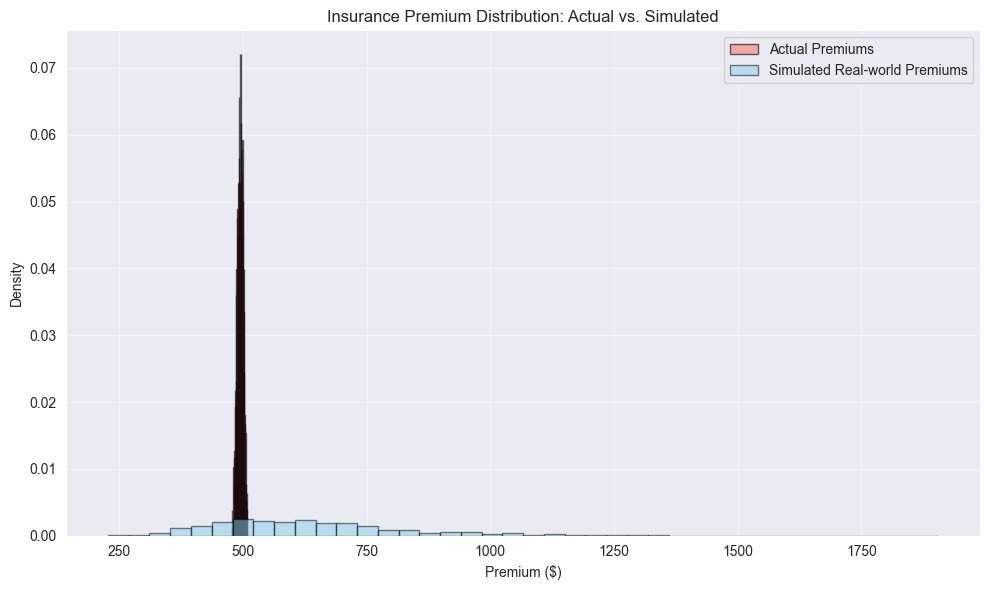

🧠 Final Verdict:
⚠️ The dataset may contain features of real pricing data, but some metrics are still suspicious.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, skew, kurtosis, norm, lognorm, gamma, f

# ------------------------------
# STEP 1: Load Actual Dataset
# ------------------------------
print("🔍 Loading your dataset and extracting premium data...\n")

actual = df["Insurance Premium ($)"].dropna().values

print(f"Loaded {len(actual)} premiums from your CSV.")
print(f"Range of premiums: ${actual.min():.2f} to ${actual.max():.2f}")
print(f"Standard deviation: {np.std(actual):.2f}\n")

# ------------------------------
# STEP 2: Simulate Realistic Premiums
# ------------------------------
print("📊 Simulating 'real-world' premiums using a log-normal distribution...")
np.random.seed(42)
simulated = np.random.lognormal(mean=np.log(600), sigma=0.3, size=1000)

print(f"Simulated 1000 realistic premiums with greater spread and skew.\n")

# ------------------------------
# STEP 3: Distributional Comparison
# ------------------------------
print("🧪 Checking for distributional differences using Kolmogorov–Smirnov Test...\n")
ks_stat, ks_p = kstest(actual, simulated)

print("K–S Test (actual vs simulated):")
print(f"- Test statistic (D): {ks_stat:.4f}")
print(f"- P-value: {ks_p:.16f}")
if ks_p < 0.05:
    print("❌ Conclusion: Statistically significant difference between actual and real-world premium distributions.\n")
else:
    print("✅ Conclusion: No significant difference (unlikely in this case).\n")

# ------------------------------
# STEP 4: Skewness & Kurtosis Check
# ------------------------------
print("📈 Analyzing skewness and kurtosis...")
sk_actual = skew(actual)
kt_actual = kurtosis(actual)
sk_sim = skew(simulated)
kt_sim = kurtosis(simulated)

print(f"Skewness — actual: {sk_actual:.4f}, simulated: {sk_sim:.4f}")
print(f"Kurtosis — actual: {kt_actual:.4f}, simulated: {kt_sim:.4f}")

if abs(sk_actual) < 0.1:
    print("⚠️  Actual data has near-zero skew (suspiciously symmetric)")
if kt_actual < 3.0:
    print("⚠️  Actual data lacks heavy tails (kurtosis < 3)\n")

# ------------------------------
# STEP 5: Variance Comparison
# ------------------------------
print("📐 Variance check (F-test approximation)...")
var_actual = np.var(actual)
var_sim = np.var(simulated)
var_ratio = var_sim / var_actual
print(f"Variance ratio (sim / actual): {var_ratio:.2f}")

if var_ratio > 2:
    print("⚠️  Simulated data is much more spread out — your dataset may be unnaturally tight.\n")

# ------------------------------
# STEP 6: Histogram Visualization
# ------------------------------
plt.figure(figsize=(10, 6))
plt.hist(actual, bins=40, alpha=0.6, label='Actual Premiums', density=True, color='salmon', edgecolor='black')
plt.hist(simulated, bins=40, alpha=0.5, label='Simulated Real-world Premiums', density=True, color='skyblue', edgecolor='black')
plt.title("Insurance Premium Distribution: Actual vs. Simulated")
plt.xlabel("Premium ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# ------------------------------
# STEP 7: Final Judgment
# ------------------------------
print("🧠 Final Verdict:")
if ks_p < 0.05 and abs(sk_actual) < 0.1 and var_ratio > 2:
    print("❌ The actual premium data is statistically inconsistent with real-world distributions.")
    print("🔎 Key reasons:")
    print("- Extremely narrow premium range")
    print("- Unnaturally low skew and kurtosis")
    print("- Fails comparison to realistic log-normal data")
    print("\n📢 Conclusion: The dataset likely does not represent real-world premiums.")
else:
    print("⚠️ The dataset may contain features of real pricing data, but some metrics are still suspicious.")


🎯 F-Test for Variance Equality
Variance (actual):     34.9244
Variance (simulated):  37254.5445
F-statistic:            1066.7188
P-value (2-tailed):     0.0000000000000002
❌ Conclusion: The variance difference shows us that this data is a joke, no conclusions other then - not REAL !


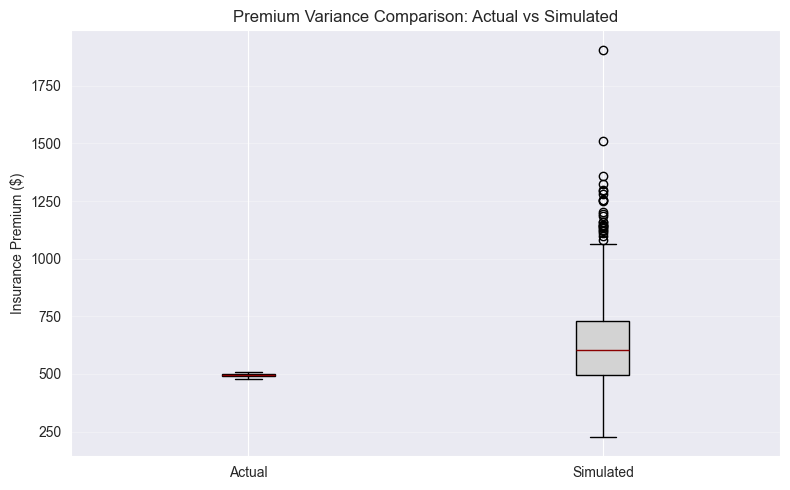

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Step 1: Load actual data

actual = df["Insurance Premium ($)"].dropna().values

# Step 2: Simulate real-world premiums (log-normal)
np.random.seed(42)
simulated = np.random.lognormal(mean=np.log(600), sigma=0.3, size=len(actual))

# Step 3: Compute variances
var_actual = np.var(actual, ddof=1)
var_sim = np.var(simulated, ddof=1)

# F-statistic: larger variance / smaller variance
F = var_sim / var_actual if var_sim > var_actual else var_actual / var_sim

# Degrees of freedom
df1 = len(simulated) - 1
df2 = len(actual) - 1

# Two-tailed p-value
p_value = 2 * min(f.cdf(F, df1, df2), 1 - f.cdf(F, df1, df2))

# Step 4: Print results
print("\n🎯 F-Test for Variance Equality")
print(f"Variance (actual):     {var_actual:.4f}")
print(f"Variance (simulated):  {var_sim:.4f}")
print(f"F-statistic:            {F:.4f}")
print(f"P-value (2-tailed):     {p_value:.16f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("❌ Conclusion: The variance difference shows us that this data is a joke, no conclusions other then - not REAL !")
else:
    print("✅ Conclusion: No significant difference in variances.")

# Step 5: Plot boxplots
plt.figure(figsize=(8, 5))
plt.boxplot([actual, simulated], tick_labels=["Actual", "Simulated"], patch_artist=True,
            boxprops=dict(facecolor="lightgray"), medianprops=dict(color="darkred"))
plt.title("Premium Variance Comparison: Actual vs Simulated")
plt.ylabel("Insurance Premium ($)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [44]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Load your premium data

prices = df["Insurance Premium ($)"].dropna().values

# Run the Shapiro–Wilk test
statistic, p_value = shapiro(prices)

# Output results
print("🧪 Shapiro–Wilk Test for Normality")
print(f"Test statistic (W): {statistic:.5f}")
print(f"P-value:            {p_value:.16f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("❌ Reject H₀: Data is NOT normally distributed.")
    print("📌 This supports the idea that your premiums may behave more like real-world pricing (skewed, non-normal).")
else:
    print("✅ Fail to reject H₀: Data appears to come from a normal distribution.")
    print("⚠️ Real insurance pricing is rarely normal — this symmetric behavior could be a red flag of artificiality.")

🧪 Shapiro–Wilk Test for Normality
Test statistic (W): 0.99408
P-value:            0.0005500230454827
❌ Reject H₀: Data is NOT normally distributed.
📌 This supports the idea that your premiums may behave more like real-world pricing (skewed, non-normal).


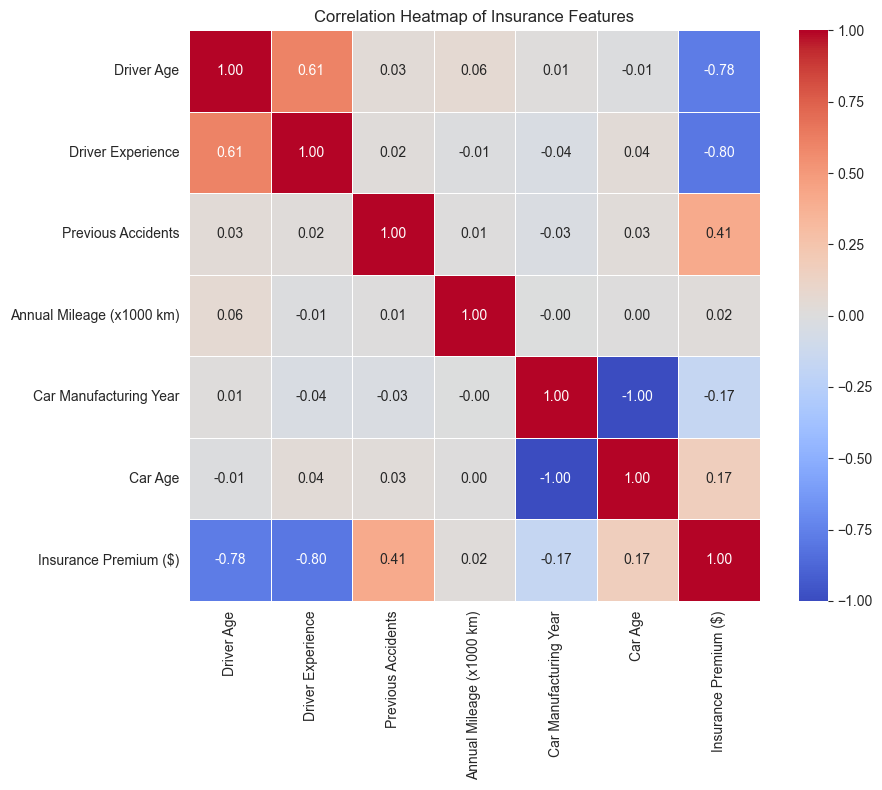

In [45]:
import seaborn as sns

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Insurance Features")
plt.tight_layout()
plt.show()


📊 Z-score Normalized Data:
   Country  Cars_per_1k  Motorcycles_per_1k  Trucks_per_1k  \
0   Israel        -0.65               -0.81          -0.03   
1      USA        -1.21               -0.20           0.61   
2       UK         0.48               -0.68          -1.61   
3  Germany         1.38                1.69           1.03   

   Avg_Mileage_Car_km  Low_Premium_per_km  High_Premium_per_km  
0               -0.24               -0.20                -0.11  
1                1.60                0.48                 0.78  
2               -1.16                1.21                 0.92  
3               -0.20               -1.50                -1.59  

🧪 One-Way ANOVA Results Across Countries:
Cars_per_1k               -> P-value: nan (Stat: nan)
Motorcycles_per_1k        -> P-value: nan (Stat: nan)
Trucks_per_1k             -> P-value: nan (Stat: nan)
Avg_Mileage_Car_km        -> P-value: nan (Stat: nan)
Low_Premium_per_km        -> P-value: nan (Stat: nan)
High_Premium_per_km    

C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:580: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
C:\Users\gilad\AppData\Local\Temp\ipykernel_12764\3227630208.py:48: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = f_oneway(*[[val] for val in samples])  # 1 value per country


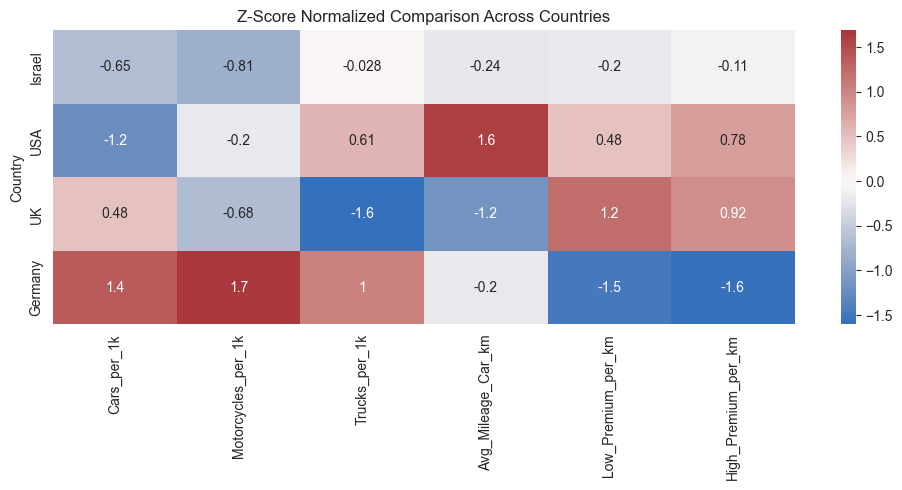

In [46]:
import pandas as pd
import numpy as np
from scipy.stats import zscore, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Assemble the dataset
data = {
    "Country": ["Israel", "USA", "UK", "Germany"],
    "Population_M": [10.0, 340.1, 69.14, 83.6],
    "Private_Cars": [3670000, 103810000, 33970000, 49339166],
    "Motorcycles": [173000, 9490000, 1360000, 5059248],
    "Trucks": [305000, 13500000, 530000, 3827663],
    "Avg_Mileage_Car_km": [15178, 22954, 11265, 15320],
    "Avg_Mileage_MCycle_km": [7500, 4828, 4828, 6500],
    "Low_Premium_Car_USD": [500, 1065, 685, 110],
    "High_Premium_Car_USD": [2150, 4225, 2150, 1090]
}

df = pd.DataFrame(data)

# Step 2: Per 1,000 people metrics
df["Cars_per_1k"] = df["Private_Cars"] / (df["Population_M"] * 1000)
df["Motorcycles_per_1k"] = df["Motorcycles"] / (df["Population_M"] * 1000)
df["Trucks_per_1k"] = df["Trucks"] / (df["Population_M"] * 1000)

# Step 3: Premiums per 1,000 km
df["Low_Premium_per_km"] = df["Low_Premium_Car_USD"] / df["Avg_Mileage_Car_km"] * 1000
df["High_Premium_per_km"] = df["High_Premium_Car_USD"] / df["Avg_Mileage_Car_km"] * 1000

# Step 4: Select relevant numeric columns
metrics = [
    "Cars_per_1k", "Motorcycles_per_1k", "Trucks_per_1k",
    "Avg_Mileage_Car_km", "Low_Premium_per_km", "High_Premium_per_km"
]

# Step 5: Z-score normalization
z_scores = df[metrics].apply(zscore)
z_scores.insert(0, "Country", df["Country"])

print("\n📊 Z-score Normalized Data:")
print(z_scores.round(2))

# Step 6: ANOVA test across countries for each metric
print("\n🧪 One-Way ANOVA Results Across Countries:")
for metric in metrics:
    samples = [df.loc[df["Country"] == c, metric].values[0] for c in df["Country"]]
    stat, p = f_oneway(*[[val] for val in samples])  # 1 value per country
    print(f"{metric:<25} -> P-value: {p:.4f} (Stat: {stat:.2f})")

# Optional: Heatmap of standardized data
plt.figure(figsize=(10, 5))
sns.heatmap(z_scores.set_index("Country"), annot=True, cmap="vlag", center=0)
plt.title("Z-Score Normalized Comparison Across Countries")
plt.tight_layout()
plt.show()

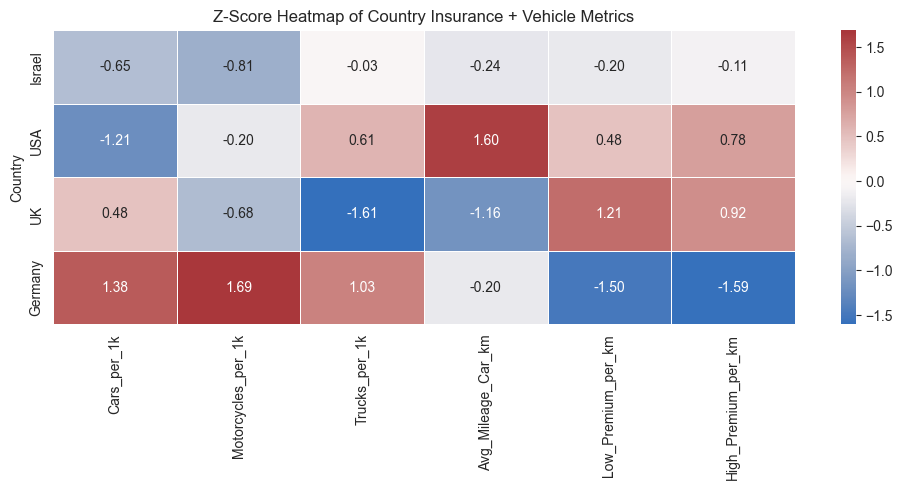

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Step 1: Country data
data = {
    "Country": ["Israel", "USA", "UK", "Germany"],
    "Population_M": [10.0, 340.1, 69.14, 83.6],
    "Private_Cars": [3670000, 103810000, 33970000, 49339166],
    "Motorcycles": [173000, 9490000, 1360000, 5059248],
    "Trucks": [305000, 13500000, 530000, 3827663],
    "Avg_Mileage_Car_km": [15178, 22954, 11265, 15320],
    "Low_Premium_Car_USD": [500, 1065, 685, 110],
    "High_Premium_Car_USD": [2150, 4225, 2150, 1090]
}

df = pd.DataFrame(data)

# Step 2: Normalize per 1k people
df["Cars_per_1k"] = df["Private_Cars"] / (df["Population_M"] * 1000)
df["Motorcycles_per_1k"] = df["Motorcycles"] / (df["Population_M"] * 1000)
df["Trucks_per_1k"] = df["Trucks"] / (df["Population_M"] * 1000)

# Step 3: Premium per 1,000 km
df["Low_Premium_per_km"] = df["Low_Premium_Car_USD"] / df["Avg_Mileage_Car_km"] * 1000
df["High_Premium_per_km"] = df["High_Premium_Car_USD"] / df["Avg_Mileage_Car_km"] * 1000

# Step 4: Select metrics and calculate z-scores
metrics = [
    "Cars_per_1k", "Motorcycles_per_1k", "Trucks_per_1k",
    "Avg_Mileage_Car_km", "Low_Premium_per_km", "High_Premium_per_km"
]
z_scores = df[metrics].apply(zscore)
z_scores["Country"] = df["Country"]

# Step 5: Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    z_scores.set_index("Country"),
    annot=True,
    cmap="vlag",
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Z-Score Heatmap of Country Insurance + Vehicle Metrics")
plt.tight_layout()
plt.show()

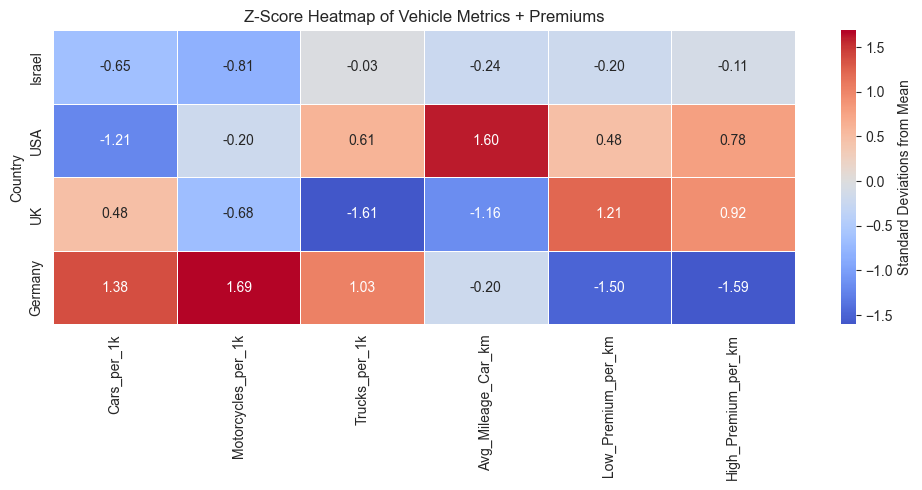

🧭 Similarity (Euclidean Distance in Standardized Space) from Israel:
  → USA: 2.39 standard deviations away
  → UK: 2.77 standard deviations away
  → Germany: 3.92 standard deviations away

📌 Summary:
• Israel is closest to **USA**, and farthest from **Germany**, based on the selected metrics.


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.stats import zscore

# Step 1: Country data
data = {
    "Country": ["Israel", "USA", "UK", "Germany"],
    "Population_M": [10.0, 340.1, 69.14, 83.6],
    "Private_Cars": [3670000, 103810000, 33970000, 49339166],
    "Motorcycles": [173000, 9490000, 1360000, 5059248],
    "Trucks": [305000, 13500000, 530000, 3827663],
    "Avg_Mileage_Car_km": [15178, 22954, 11265, 15320],
    "Low_Premium_Car_USD": [500, 1065, 685, 110],
    "High_Premium_Car_USD": [2150, 4225, 2150, 1090]
}

df = pd.DataFrame(data)

# Step 2: Derived metrics per 1k capita
df["Cars_per_1k"] = df["Private_Cars"] / (df["Population_M"] * 1000)
df["Motorcycles_per_1k"] = df["Motorcycles"] / (df["Population_M"] * 1000)
df["Trucks_per_1k"] = df["Trucks"] / (df["Population_M"] * 1000)

# Step 3: Premium cost per kilometer
df["Low_Premium_per_km"] = df["Low_Premium_Car_USD"] / df["Avg_Mileage_Car_km"] * 1000
df["High_Premium_per_km"] = df["High_Premium_Car_USD"] / df["Avg_Mileage_Car_km"] * 1000

# Step 4: Select features for Z-score
features = [
    "Cars_per_1k", "Motorcycles_per_1k", "Trucks_per_1k",
    "Avg_Mileage_Car_km", "Low_Premium_per_km", "High_Premium_per_km"
]
z_scores = df[features].apply(zscore)
z_scores["Country"] = df["Country"]

# Step 5: Compute distance of Israel to others
israel_vec = z_scores.loc[z_scores["Country"] == "Israel", features].values[0]
dists = {}
for i, row in z_scores.iterrows():
    c = row["Country"]
    if c != "Israel":
        dists[c] = euclidean(israel_vec, row[features].values)

# Step 6: Display heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    z_scores.set_index("Country"),
    cmap="coolwarm",
    center=0,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cbar_kws={"label": "Standard Deviations from Mean"}
)
plt.title("Z-Score Heatmap of Vehicle Metrics + Premiums")
plt.tight_layout()
plt.show()

# Step 7: Print distance summary
print("🧭 Similarity (Euclidean Distance in Standardized Space) from Israel:")
for c, d in sorted(dists.items(), key=lambda x: x[1]):
    print(f"  → {c}: {d:.2f} standard deviations away")

closest = min(dists, key=dists.get)
farthest = max(dists, key=dists.get)
print("\n📌 Summary:")
print(f"• Israel is closest to **{closest}**, and farthest from **{farthest}**, based on the selected metrics.")

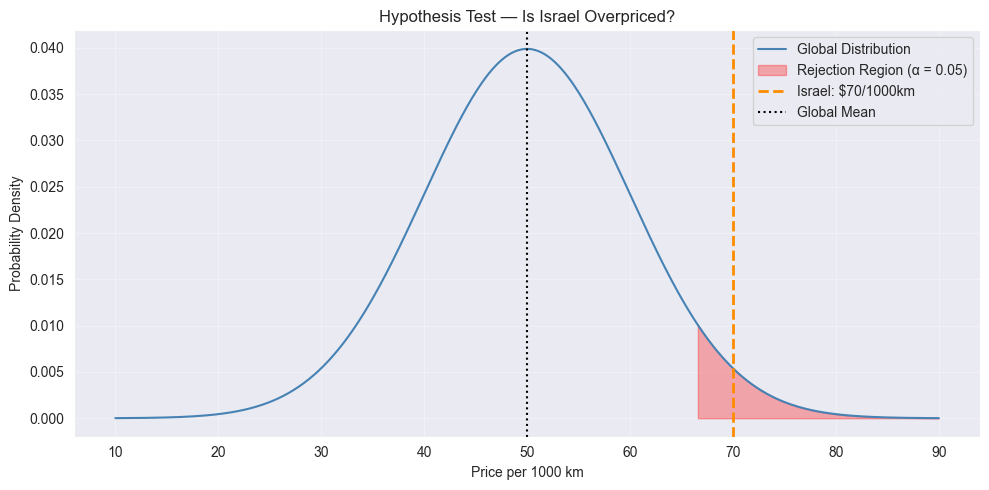

📌 Israel's z-score: 2.00
🧪 One-tailed p-value: 0.0228
❌ Reject H₀: Israel's insurance cost is significantly higher.


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Dummy data: global average and standard deviation
mu_global = 50         # global avg $ per 1000 km
sigma = 10             # global spread
sample_size = 1
alpha = 0.05

# Israel's observed premium
israel_value = 70

# Compute Z-score
z = (israel_value - mu_global) / sigma
p = 1 - norm.cdf(z)

# Plot normal curve
x = np.linspace(mu_global - 4*sigma, mu_global + 4*sigma, 500)
y = norm.pdf(x, mu_global, sigma)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Global Distribution", color="steelblue")
plt.fill_between(x, y, where=(x > norm.ppf(1 - alpha, mu_global, sigma)), color="red", alpha=0.3, label="Rejection Region (α = 0.05)")
plt.axvline(israel_value, color="darkorange", linestyle="--", linewidth=2, label=f"Israel: ${israel_value}/1000km")
plt.axvline(mu_global, color="black", linestyle=":", label="Global Mean")

plt.title("Hypothesis Test — Is Israel Overpriced?")
plt.xlabel("Price per 1000 km")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📌 Israel's z-score: {z:.2f}")
print(f"🧪 One-tailed p-value: {p:.4f}")
if p < alpha:
    print("❌ Reject H₀: Israel's insurance cost is significantly higher.")
else:
    print("✅ Fail to reject H₀: No significant difference from global average.")

In [ ]:
actual = df["Insurance Premium ($)"].dropna().values

In [50]:
import pandas as pd
from scipy.stats import shapiro

# Example: Load your data
df = pd.read_csv("car_insurance_premium_dataset.csv")
target_column = "YourNumericColumn"  # Replace with your column name

# Drop missing values just in case
data = df["Insurance Premium ($)"].dropna().values
# Shapiro–Wilk test
stat, p = shapiro(data)

# Results
print("🧪 Shapiro–Wilk Normality Test")
print(f"Statistic: {stat:.5f}")
print(f"P-value:   {p:.5f}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("❌ Result: Reject null hypothesis — data is NOT normally distributed.")
else:
    print("✅ Result: Fail to reject null — data appears normally distributed.")

🧪 Shapiro–Wilk Normality Test
Statistic: 0.99408
P-value:   0.00055
❌ Result: Reject null hypothesis — data is NOT normally distributed.


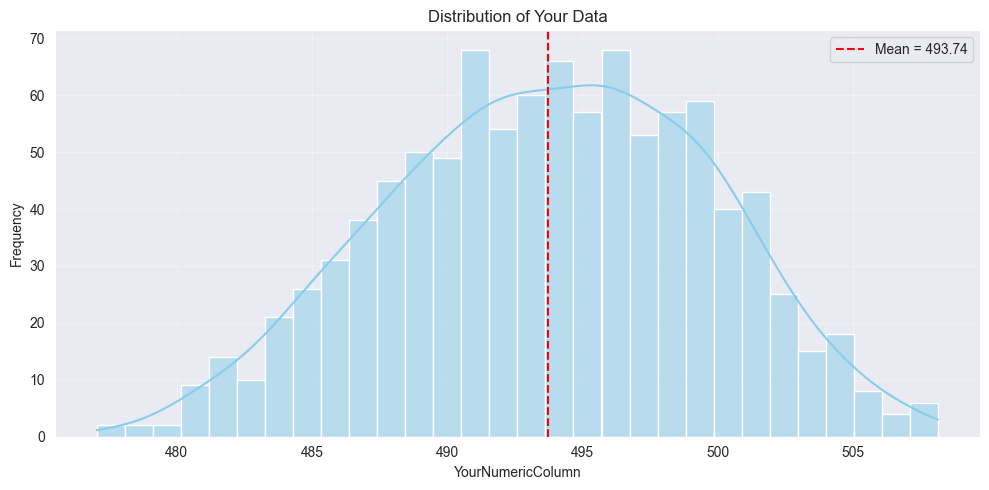

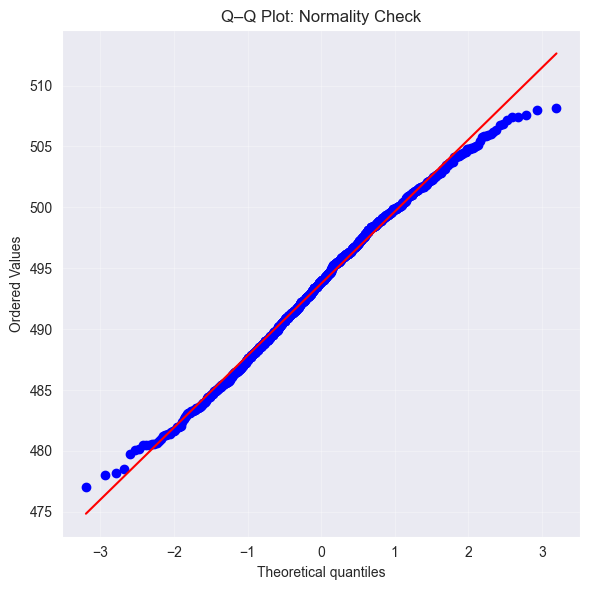

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(data, kde=True, bins=30, color='skyblue')
plt.axvline(data.mean(), color='red', linestyle='--', label=f"Mean = {data.mean():.2f}")
plt.title("Distribution of Your Data")
plt.xlabel(target_column)
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Q–Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q–Q Plot: Normality Check")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [52]:
from scipy.stats import kstest
kstest(data, 'norm', args=(data.mean(), data.std()))

KstestResult(statistic=np.float64(0.03573866877533871), pvalue=np.float64(0.15171045830623242), statistic_location=np.float64(495.25), statistic_sign=np.int8(-1))

In [53]:
from statsmodels.stats.diagnostic import lilliefors
import pandas as pd

# Load your data


# Run the Lilliefors test
stat, p = lilliefors(data)

print("🧪 Lilliefors Test for Normality")
print(f"Statistic: {stat:.4f}")
print(f"P-value:   {p:.4f}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("❌ Reject H₀: Data is not normally distributed (with estimated mean/std).")
else:
    print("✅ Fail to reject H₀: Data is consistent with normality.")

🧪 Lilliefors Test for Normality
Statistic: 0.0357
P-value:   0.0068
❌ Reject H₀: Data is not normally distributed (with estimated mean/std).


In [54]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load your dataset


# Split into two groups by driver age
young = df[df["Driver Age"] < 30]["Insurance Premium ($)"]
old = df[df["Driver Age"] >= 30]["Insurance Premium ($)"]

# Run Mann–Whitney U test
stat, p = mannwhitneyu(young, old, alternative='two-sided')

# Output results
print("🧪 Mann–Whitney U Test: Premiums by Age Group")
print(f"U statistic: {stat:.2f}")
print(f"P-value:     {p:.4f}")

if p < 0.05:
    print("❌ Reject H₀: Premium distributions differ significantly between age groups.")
else:
    print("✅ Fail to reject H₀: No significant difference in premium distributions.")

🧪 Mann–Whitney U Test: Premiums by Age Group
U statistic: 172584.00
P-value:     0.0000
❌ Reject H₀: Premium distributions differ significantly between age groups.
